# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Для первого знакомства с данными импортируем библиотеку `pandas` и сохраним предоставленный файл в переменной `data`.

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn

import warnings

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv')  # чтение файла с данными и сохранение в data
data.head()  # получение первых 5 строк таблицы df

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Как мы видим, данные не разбиты по колонкам. Это произошло по причине того, что в файле разделителем выступает не запятая, а знак табуляции `\t`. Прочитаем файл еще раз, указав в качестве разделителя знак табуляции.

In [3]:
# чтение файла с данными и сохранение в data с учётом разделителя столбцов
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
pd.set_option('display.max_columns', None)
data.head()  # получение первых 5 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о таблице методом `info()`.

In [4]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 23699 строк, 22 колонки. Встречаются разные типы данных: `bool`, `int64`, `object`.  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Некоторые названия колонок записаны с нарушением стиля: название, состоящее из нескольких слов, должно быть записано "змеиным регистром".

### Вывод

Данные прочтены, получена общая информация о датасете. 
В каждой строке таблицы — данные о продаже квартиры. Часть колонок описывает характеристики самой квартиры: площадь, количество комнат, высота потолков и т.д. Остальные данные рассказывают ее местоположении: расстояние до центра, близость парков и водоемов. 

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.



## Предобработка данных

###  Стиль заголовков

Выведем на экран названия столбцов:

In [5]:
data.columns # перечень названий столбцов таблицы

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Исправим стиль в заголовках столбцов, используя метод `rename`.   
Для этого переименуйте колонки так:
* `cityCenters_nearest` → `city_centers_nearest`
* `parks_around3000` → `parks_around_3000`
* `ponds_around3000` → `ponds_aroundи_3000`


In [6]:
data = data.rename(columns={                       # переименование столбцов
    'cityCenters_nearest':'city_centers_nearest', 
    'parks_around3000':'parks_around_3000', 
    'ponds_around3000' :'ponds_around_3000'
})     

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [7]:
data.columns # перечень названий столбцов таблицы

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Заполнение пропусков

Посчитаем сколько в таблице пропущенных значений. Для этого воспользуемся методами `isna()` и `sum()`.

In [8]:
(data.isna().mean()*100).round(1) # подсчет пропущенных значений 

total_images             0.0
last_price               0.0
total_area               0.0
first_day_exposition     0.0
rooms                    0.0
ceiling_height          38.8
floors_total             0.4
living_area              8.0
floor                    0.0
is_apartment            88.3
studio                   0.0
open_plan                0.0
kitchen_area             9.6
balcony                 48.6
locality_name            0.2
airports_nearest        23.4
city_centers_nearest    23.3
parks_around_3000       23.3
parks_nearest           65.9
ponds_around_3000       23.3
ponds_nearest           61.6
days_exposition         13.4
dtype: float64

Пропуски встречаются в 13 колонках из 22. Наибольшее количество пропусков - 88% в колонке `is_apartment`. Так же большое количество пропусков в столбцах с информацией о высоте потолков, наличии балконов, а также в колонках, полученных на основе картографических данных.

#### Заполнение пропусков в столбце 'ceiling_height' 

Пропуски в столбцах `ceiling_height` составляют 38,8% всей таблицы. Вероятно, при подаче объявлений, некоторые продавцы сочли данную информацию несущественной. Так как пропусков достаточно много, замена их на медианное значение создаст пик в медиане, который повлияет на корреляцию и дисперсию. На данном этапе оставим пропуски в колонке  `ceiling_height` без изменений.

#### Заполнение  пропусков в столбце 'floors_total'

Пропуски в графе `floors_total` встречаются в 86 строках, что составляет 0,4% от датафрейма. Т.к. нам предстоит выяснить как этаж влияет на цену (первый, последний, другой), то отсутствие информации об этажности дома не позволит этого сделать. Избавимсся от срок с пропусками методом `dropna`.

In [11]:
data = data.dropna(subset=['floors_total']) # удаление пропусков 

Сразу заменим тип значений в столбце `floors_total` с `float` на `int64`. Используем метод `astype()`.

In [12]:
data["floors_total"] = data["floors_total"].astype('int') # перевод значений из типа 'float' в тип 'int'

<ipython-input-12-e6b6bc60104c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["floors_total"] = data["floors_total"].astype('int') # перевод значений из типа 'float' в тип 'int'


In [13]:
data['floors_total'].dtypes # проверка типа значений в колонке 'floors_total'

dtype('int64')

#### Заполнение  пропусков в столбце 'living_area'

Пропуски в графе `living_area` составляют 8%. Жилая площадь – это сумма площадей жилых комнат. В жилую площадь не включается площадь кухни, коридора, санузлов. Рассчитаем среднее отношение `living_area` / `total_area`, расчитанное в зависимости от числа комнат, и заменим пропуски на `total_area`, умноженное на это соотношение.

In [14]:
data['living_area'].isna().sum() # подсчет пропусков в столбце 'living_area'

1870

In [15]:
# рассчет среднего отношения living_area / total_area, в зависимости от числа комнат
a = data.groupby(['rooms'])['living_area'].sum()
b = data.groupby(['rooms'])['total_area'].sum()
c = a / b
print(c)

rooms
0     0.606908
1     0.437016
2     0.522866
3     0.563189
4     0.575312
5     0.556315
6     0.613097
7     0.553775
8     0.650701
9     0.544080
10    0.637858
11    0.708841
12    0.455222
14    0.641519
15    0.693220
16    0.666667
19    0.706086
dtype: float64


In [16]:
# функция для расчета среднего значения жилой площади, в зависимости от числа комнат
def abc(row):
    living_area = row['total_area'] * c[1]
    return living_area

In [17]:
# замена пропусков на медианные значения, расчитанные в зависимости от количества комнат
data['living_area'] = data['living_area'].fillna(data.apply(abc, axis=1))
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.000000,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11,18.600000,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5,34.300000,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14,69.485550,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.000000,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12,14.400000,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26,10.600000,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24,31.290348,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27,15.430000,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.600000,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [19]:
00data['living_area'].isna().sum() # подсчет пропусков в столбце 'living_area'

0

В столбце `living_area` не осталось пропущенных значений.

#### Заполнение пропусков в столбце 'is_apartment'

Просмотрим какими значениями заполнен столбец `is_apartment`.

In [20]:
data['is_apartment'].value_counts() # просмотр уникальных значений столбца 'is_apartment'

False    2725
True       50
Name: is_apartment, dtype: int64

In [21]:
data['is_apartment'].isna().sum() # подсчет пропусков

20838

Столбец содержит два типа значений: `Тrue` - если объект является аппартаментом, и `False` - если нет. Вероятнее всего пропуски в данном столбце допущены в том случае, когда объект недвижимости не является аппартаментом. Продавцы просто не сочли нужным заполнять данную графу. Заменим пропуски на значение `Fasle` используя метод `fillna()`.


In [22]:
data['is_apartment'] = data['is_apartment'].fillna(False) # замена пропусков 

Убедимся, что в столбце `is_apartment` не осталось пропущенных значений.

In [23]:
data['is_apartment'].isna().sum() # подсчет пропусков

0

In [24]:
data['is_apartment'].value_counts() # просмотр уникальных значений столбца 'is_apartment'

False    23563
True        50
Name: is_apartment, dtype: int64

#### Заполнение пропусков в столбце 'kitchen_area'

В столбце `kitchen_area` пропуски встречаются в 9.6% случаев. Вероятно, при публикации объявления, собственники сочли эту информацию не важной, или поленились уточнить информацию в документах.

In [25]:
data[data['kitchen_area'].isna()] # подсчет пропусков

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,69.485550,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,NaN,9,14.334126,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5,20.015335,1,False,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22,17.480642,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,NaN,13,20.321246,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18,19.600000,10,False,False,False,NaN,NaN,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10,38.457412,1,False,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9,19.927931,2,False,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,NaN,9,15.295561,4,False,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В таблице присутствуют квартиры свободной планировки, студии и аппартаменты. Посмотрим распределение площади кухни для квартир этих планировок.

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,50.0000,5.000000e+01,50.000000,50.000000,44.000000,50.000000,50.000000,50.00000,35.000000,31.000000,41.000000,43.000000,43.000000,19.000000,43.000000,30.000000,38.000000
mean,11.1600,1.292420e+07,83.325800,2.080000,6.313864,6.900000,46.629044,4.48000,17.727429,2.064516,33166.463415,14851.000000,0.953488,255.263158,1.232558,534.200000,258.736842
std,5.9637,1.616967e+07,74.015753,1.209486,15.213780,5.218687,45.831179,3.96536,15.749551,1.314927,12961.095675,11138.598302,1.174197,199.620151,1.151339,264.508575,389.759294
min,0.0000,2.150000e+06,20.100000,1.000000,2.500000,2.000000,8.784022,1.00000,5.000000,1.000000,8426.000000,318.000000,0.000000,4.000000,0.000000,22.000000,6.000000
25%,8.0000,4.815750e+06,47.800000,1.000000,2.800000,4.000000,20.640000,2.00000,10.000000,1.000000,24309.000000,5735.000000,0.000000,116.500000,0.000000,322.000000,19.750000
50%,11.0000,6.900000e+06,64.000000,2.000000,3.000000,5.000000,36.000000,3.00000,11.700000,2.000000,31006.000000,13261.000000,0.000000,160.000000,1.000000,569.000000,78.000000
75%,16.0000,1.246768e+07,95.950000,3.000000,3.200000,7.000000,54.461765,5.00000,20.000000,2.000000,44870.000000,20802.000000,2.000000,363.500000,2.500000,792.000000,276.750000
max,20.0000,8.400000e+07,507.000000,7.000000,100.000000,27.000000,301.500000,22.00000,87.200000,5.000000,73391.000000,54490.000000,3.000000,714.000000,3.000000,826.000000,1572.000000


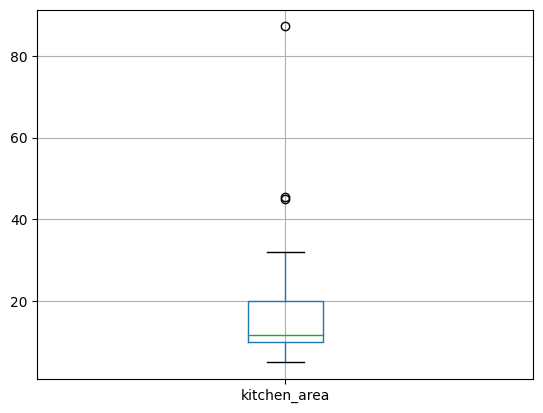

In [26]:
data.query('is_apartment == True').boxplot('kitchen_area') # построение диаграммы размаха
data.query('is_apartment == True').describe() # получение списка характерных значений

Медиана столбца `kitchen_area` для аппартаментов составляет 11,7 кв.м. Заменим этим значение пропуски.

In [27]:
data['kitchen_area'] = data['kitchen_area'].where((data['is_apartment'] == False),11.7) # выборочное изменение значений
data['kitchen_area'].isna().sum() # подсчет пропусков

2216

Проверим как сработал метод. Выведем строки таблицы, квартиры в которых являются аппартаментами.

In [28]:
data[data['is_apartment'] == True].tail() # вывод последних строк таблицы с условием 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22560,15,5500000.0,98.0,2018-12-09T00:00:00,3,2.6,8,42.827572,2,True,False,False,11.7,NaN,Красное Село,27164.0,30589.0,0.0,NaN,0.0,NaN,7.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5,14.000000,5,True,False,False,11.7,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2,73.000000,2,True,False,False,11.7,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
22941,8,10965000.0,69.3,2019-01-10T00:00:00,1,3.0,4,48.900000,4,True,False,False,11.7,2.0,Зеленогорск,73391.0,54490.0,3.0,4.0,1.0,217.0,110.0
23236,18,13900000.0,95.0,2017-10-15T00:00:00,3,2.8,15,50.000000,15,True,False,False,11.7,4.0,Санкт-Петербург,27573.0,9436.0,1.0,714.0,0.0,NaN,7.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,146.000000,1.460000e+02,146.000000,146.000000,77.000000,146.000000,146.000000,146.000000,0.0,91.000000,91.000000,91.000000,91.000000,20.000000,91.000000,50.000000,132.000000
mean,7.849315,3.073833e+06,27.808151,0.075342,2.800390,16.541096,18.624642,8.095890,NaN,1.538462,24945.923077,13361.802198,0.263736,537.900000,0.780220,525.140000,122.015152
std,4.866979,1.586577e+06,9.396492,0.264852,0.389096,6.860307,7.366256,5.844336,NaN,0.719687,12632.125391,5070.263025,0.534065,324.553929,0.866695,267.964665,174.318038
min,0.000000,9.457500e+05,15.500000,0.000000,2.500000,3.000000,2.000000,1.000000,NaN,0.000000,6989.000000,1261.000000,0.000000,38.000000,0.000000,80.000000,3.000000
25%,4.000000,2.300000e+06,24.000000,0.000000,2.700000,12.000000,16.000000,3.000000,NaN,1.000000,14317.000000,10929.000000,0.000000,319.750000,0.000000,368.000000,28.750000
50%,7.000000,2.750000e+06,26.025000,0.000000,2.700000,17.000000,18.000000,7.000000,NaN,2.000000,21928.000000,14069.000000,0.000000,505.000000,1.000000,490.500000,55.500000
75%,11.000000,3.450000e+06,28.975000,0.000000,2.800000,23.000000,19.500000,12.000000,NaN,2.000000,34613.000000,16216.000000,0.000000,666.750000,1.000000,660.250000,153.000000
max,20.000000,1.630000e+07,98.400000,1.000000,5.800000,35.000000,68.000000,24.000000,NaN,2.000000,55551.000000,29846.000000,2.000000,1199.000000,3.000000,1159.000000,931.000000


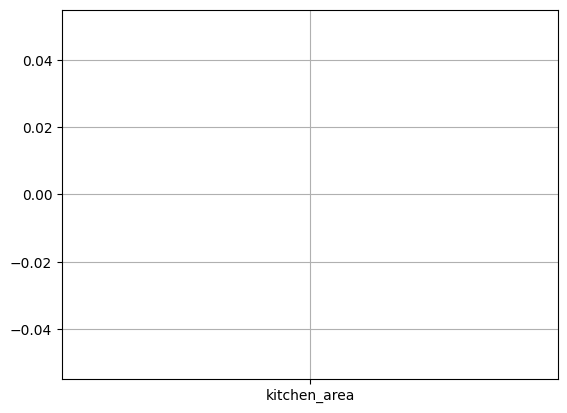

In [29]:
data.query('studio == True').boxplot('kitchen_area') # построение диаграммы размаха
data.query('studio == True').describe() # получение списка характерных значений

Для квартир-студий в таблице нет информации о площади кухни. Заменим пропуски для квартир этого типа минимальным значением  - 5 кв.м. 

In [30]:
data['kitchen_area'] = data['kitchen_area'].where((data['studio'] == False), 5) # выборочное изменение значений
data['kitchen_area'].isna().sum() # подсчет пропусков

2070

In [31]:
data[data['studio'] == True].tail() # вывод последних строк таблицы с условием 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22867,8,3090000.0,30.0,2017-12-17T00:00:00,0,NaN,25,18.200000,5,False,True,False,5.0,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.0,2017-10-26T00:00:00,0,2.7,19,18.000000,10,False,True,False,5.0,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.0,2017-09-01T00:00:00,0,NaN,25,18.000000,16,False,True,False,5.0,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.0,2018-09-07T00:00:00,0,NaN,19,11.362417,8,False,True,False,5.0,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23637,8,2350000.0,26.0,2018-06-26T00:00:00,0,NaN,25,17.000000,4,False,True,False,5.0,2.0,посёлок Бугры,NaN,NaN,NaN,NaN,NaN,NaN,207.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,67.000000,6.700000e+01,67.000000,67.000000,15.000000,67.000000,67.000000,67.000000,0.0,54.000000,37.000000,37.000000,37.000000,11.000000,37.000000,24.000000,67.000000
mean,7.253731,4.741851e+06,36.990000,0.298507,4.448000,16.955224,22.974724,9.179104,NaN,1.462963,24996.945946,13389.891892,0.432432,589.181818,0.945946,500.000000,88.328358
std,5.469871,1.003273e+07,45.723431,0.953700,6.245294,7.018229,20.184213,6.958590,NaN,0.719354,12555.595749,6222.288811,0.728032,275.584041,0.941215,281.717713,114.375298
min,0.000000,1.315000e+06,16.000000,0.000000,2.500000,4.000000,10.500000,1.000000,NaN,0.000000,10031.000000,2111.000000,0.000000,205.000000,0.000000,72.000000,3.000000
25%,3.000000,2.345000e+06,25.000000,0.000000,2.700000,11.000000,17.000000,3.500000,NaN,1.000000,15706.000000,11538.000000,0.000000,376.000000,0.000000,218.250000,22.500000
50%,7.000000,2.730000e+06,27.100000,0.000000,2.800000,17.000000,18.000000,8.000000,NaN,2.000000,21460.000000,12890.000000,0.000000,592.000000,1.000000,581.500000,45.000000
75%,10.000000,3.525000e+06,30.750000,0.000000,2.900000,24.000000,21.600000,13.000000,NaN,2.000000,32036.000000,16788.000000,1.000000,758.500000,1.000000,720.500000,89.500000
max,21.000000,7.100000e+07,371.000000,5.000000,27.000000,35.000000,162.132951,26.000000,NaN,2.000000,53791.000000,33606.000000,2.000000,1021.000000,3.000000,936.000000,521.000000


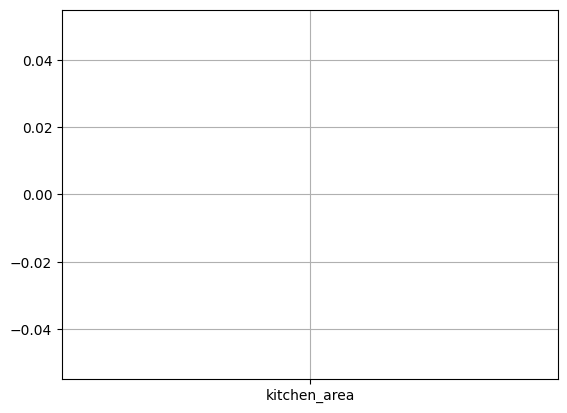

In [32]:
data.query('open_plan == True').boxplot('kitchen_area') # построение диаграммы размаха
data.query('open_plan == True').describe() # получение списка характерных значений

В таблице 67 квартир свободной планировки, но ни по одной из них не указана площадь кухни. Установим для квартир этой планировки значение площади кухни равное нулю.

In [33]:
data['kitchen_area'] = data['kitchen_area'].where(((data['open_plan'] == False)), 0) # выборочное изменение значений

In [34]:
data[data['open_plan'] == True].tail() # вывод последних строк таблицы с условием 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21299,13,2450000.0,28.5,2017-11-22T00:00:00,0,NaN,12,18.0,7,False,False,True,0.0,2.0,Санкт-Петербург,20381.0,19383.0,0.0,NaN,1.0,579.0,73.0
21628,9,3900000.0,34.0,2017-03-18T00:00:00,0,NaN,20,24.0,10,False,False,True,0.0,2.0,Санкт-Петербург,15506.0,13615.0,0.0,NaN,1.0,767.0,320.0
22573,8,2250000.0,24.0,2017-09-28T00:00:00,0,NaN,12,15.0,3,False,False,True,0.0,2.0,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23442,0,2500000.0,27.7,2017-09-28T00:00:00,0,NaN,24,18.0,4,False,False,True,0.0,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23592,10,1450000.0,29.0,2017-11-11T00:00:00,0,NaN,9,18.0,8,False,False,True,0.0,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [35]:
data['kitchen_area'].isna().sum() # подсчет пропусков

2003

После того, как мы установили площадь кухни для квартир свободной планировки, студий и аппартаментов в таблице осталовь еще 2003 пропусков в графе `kitchen_area`.

Теперь заменим оставшиеся пропуски в графе `kitchen_area` на медианное значение, расчитанное в зависимости от количества комнат. Для этого используем методы `fillna`, `groupby` и `transform`.

In [36]:
# замена пропусков медианным значением 
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform("median")) 

Убедимся что в стобце не осталось пропусков.

In [37]:
data['kitchen_area'].isna().sum() # подсчет пропусков

0

#### Заполнение пропусков в столбце 'balcony'

При подаче объявления продавцы страются указать все преимущества своей квартиры. И вероятнее всего, если в квартире есть балкон, продавец укажет о его наличии в объявлении. Будем считать, что знаения в столбце `balcony` пропущены в том случае, если балкон в квартире отсутствует. Кроме того, информация о наличии балконов не пригодится для исследования, в связи с этим все пропуски в графе `balcony` заменим на `0`.

In [38]:
data['balcony'] = data['balcony'].fillna(0) # замена пропусков 

In [39]:
data['balcony'].isna().sum() # подсчет пропусков

0

#### Заполнение пропусков в столбце 'locality_name'

Просмотрим строки с пропущенными значениями.

In [40]:
data[data['locality_name'].isna()] # вывод на экран с пропусками в столбце 'locality_name'

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5,50.800000,2,False,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4,42.600000,2,False,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24,15.600000,3,False,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24,33.100000,21,False,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5,30.800000,5,False,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8,39.620000,7,False,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4,52.300000,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7,36.272331,6,False,False,False,9.50,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7,59.100000,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24,20.000000,23,False,False,False,9.00,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


В столбце пропущены значения в 48 строках, что составляет 0,2% от датафрейма. Можно было бы попробовать определить населенный пункт по близости центра города. Но нельзя быть уверенными, что попадание будет точным. Т.к. объем пропущенных значений невелик, удалим строки с пропусками методом `dropna`.

In [41]:
data = data.dropna(subset=['locality_name']) # удаление строк с пропусками в столбце 'locality_name'

In [42]:
data['locality_name'].isna().sum() # подсчет пропусков

0

####   Заполнение пропусков в столбце 'airports_nearest'

В столбце `airports_nearest` пропущено 23,4% значений. Данный параметр не влияет на исследование. Заполним пропуски медианным значением, рассчитанным для каждого населенного пункта. 

In [43]:
# замена пропусков медианным значением 
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform("median"))

<ipython-input-43-f23f864d7a43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform("median"))


In [44]:
data['airports_nearest'].isna().sum() # подсчет пропусков

5432

Как мы видим в таблице еще остались пропуски. Заменим оставшиеся пропуски медианой для всего столбца `airports_nearest`.

In [45]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median()) # замена пропусков в столбце 'cityCenters_nearest' 
                                                                 # на медианное значение
data['airports_nearest'].isna().sum() # подсчет пропусков

0

#### Заполнение пропусков в столбце 'city_centers_nearest'

В столбце допущены пропуски в 23.3% значений. 

In [46]:
data['city_centers_nearest'].isna().sum() # подсчет пропусков

5501

In [47]:
data[data['city_centers_nearest'].isna()]['locality_name'].value_counts().head(15) # просмотр уникальных значений

посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Волхов                     111
Кингисепп                  104
Тосно                      104
Никольское                  93
Коммунар                    89
Name: locality_name, dtype: int64

Проверим есть ли пропуски для г.Санкт-Петербург:

In [48]:
data.query('city_centers_nearest.isna() & locality_name == "Санкт-Петербург"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10,29.717091,6,False,False,False,9.00,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN
593,20,4200000.0,38.30,2019-04-16T00:00:00,1,2.60,16,19.800000,10,False,False,False,10.10,2.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN
604,11,9899000.0,101.00,2018-12-12T00:00:00,3,3.00,5,62.000000,3,False,False,False,15.00,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN
742,7,37000000.0,161.00,2016-05-22T00:00:00,3,NaN,9,84.000000,8,False,False,False,9.50,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,402.0
795,19,7100000.0,59.60,2019-02-13T00:00:00,2,3.40,5,36.600000,2,False,False,False,12.50,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN
1336,12,18500000.0,66.00,2017-06-08T00:00:00,1,3.00,7,25.000000,7,False,False,False,35.00,1.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,130.0
1872,13,3100000.0,32.00,2019-03-15T00:00:00,1,NaN,4,19.000000,2,False,False,False,5.00,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,3.0
1895,12,9500000.0,130.00,2019-03-27T00:00:00,5,NaN,5,90.000000,2,False,False,False,15.00,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,15.0
2364,17,4300000.0,32.60,2019-04-28T00:00:00,1,NaN,25,14.300000,17,False,False,False,8.10,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN
2707,14,5650000.0,51.00,2019-02-26T00:00:00,2,3.20,9,31.000000,5,False,False,False,10.00,0.0,Санкт-Петербург,26763.0,NaN,NaN,NaN,NaN,NaN,NaN


Для города Санкт-Петербург нет пропусков в столбце `city_centers_nearest`.

Заменим пропуски медианными значениями для каждого населенного пункта. 

In [49]:
# замена пропусков медианным значением 
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform("median"))

In [50]:
data['city_centers_nearest'].isna().sum() # подсчет пропусков

5432

После обрабоки осталась основная масса пропусков, значит для данных населенных пунктов не удалось рассчитать медианное время до центра города.

####  Заполнение пропусков в столбце 'parks_around_3000'

Как и в прошлых столбцах пропуски в 23.3% значений. Вероятно по некоторым населенным пунктам отсутствует информация из таблицы на основе картографических данных. Информация о наличии рядом парка, о расстоянии до парка, а также о наличии рядом водоева и расстоянии до него, не понадобилься в исследовании. Пропуски в этих столбцах заменим на 0.

In [51]:
data['parks_around_3000'] = data['parks_around_3000'].fillna(0) # заполнение пропусков 
data['parks_around_3000'].isna().sum() # подсчет пропусков

0

#### Заполнение пропусков в столбце  'parks_nearest'

Заполним пропуск в графе `parks_nearest` пустой строкой.

In [52]:
data['parks_nearest'] = data['parks_nearest'].fillna(' ') # заполнение пропусков 
data['parks_nearest'].isna().sum() # подсчет пропусков

0

#### Заполнение пропусков в столбце 'ponds_around_3000'

Заменим пропуски в тстолбце `ponds_around_3000` на 0.

In [53]:
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0) # заполнение пропусков 
data['ponds_around_3000'].isna().sum() # подсчет пропусков

0

#### Заполнение пропусков в столбце 'ponds_nearest'

Заполним пропуск в графе `ponds_nearest` пустой строкой.

In [54]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(' ')
data['ponds_nearest'].isna().sum() # подсчет пропусков

0

#### Заполнение пропусков в столбце 'days_exposition'

Данные в столбце `days_exposition` содержат информацию о том, сколько дней было размещено объявление (от публикации до снятия). Пропуски здесь могут говорить о том, что вероятно квартира так и не была продана.

Проверим это предположение. Для этого построим две гистограммы для столбца `first_day_exposition`, одну для среза по `isna()` для `days_exposition`, вторую для `notna()` и сравним их.

В столбце `first_day_exposition` указана дата первой публикации объявления, но тип значений - `object`. Переведем значения столбца в тип `datetime64`, используя метод `to_datetime()`.

In [55]:
data['first_day_exposition'] = pd.to_datetime(                 # перевод значений из object в datetime64
   data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
) 

<Axes: >

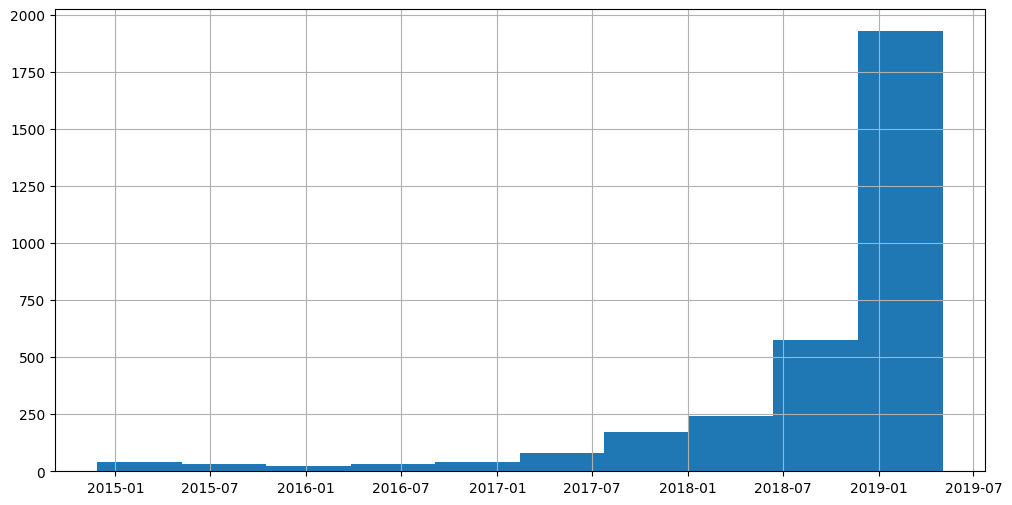

In [56]:
data.query('days_exposition.isna()')['first_day_exposition'].hist(figsize=(12, 6)) # построение гистограммы

Как мы видим, дата публикации основной массы незакрытых объявлений приходится на конец периода. Т.е. такие объявления находятся на сайте сравнительно недолго.

<Axes: >

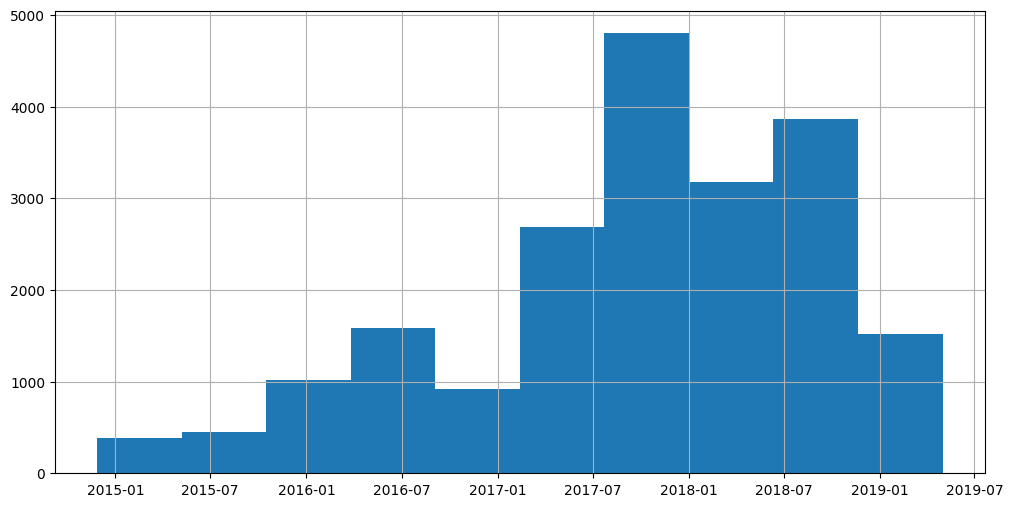

In [57]:
data.query('days_exposition.notna()')['first_day_exposition'].hist(figsize=(12, 6))  # построение гистограммы

Можем сделать вывод, что пропуски в столбце `days_exposition` означают, что объявление не было закрыто, квартира не продана. В этом случае нелогично менять пропуски на средние значения, что это может исказить результаты исследования.

### Изменение типов данных

В предыдущих шагах мы вносили измения в данные. Вызовем еще раз метод `info()`, чтобы посмотреть какие типы данных содержатся в таблице сейчас.

In [59]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Для столбца `last_price` переведем значения из рублей в тысячи рублей, для облегчения расчетов.

In [60]:
data["last_price"] = data["last_price"] / 1000 # перевод значений столбца в тысячи рублей
data["last_price"].isna().sum() #подсчет пропусков

0

В списке уникальных значений дважды встречается "0", после измения типа данных, данные будут отражаться корректно.

In [61]:
data["balcony"] = pd.to_numeric(data["balcony"], errors='coerce') # перевод строковых значений в числа
data["balcony"] = data["balcony"].astype('int') # перевод из "float" в "int"
data["balcony"].isna().sum()  #подсчет пропусков

0

In [62]:
data['balcony'].value_counts() # просмотр уникальных значений

0    15155
1     4187
2     3656
5      304
4      182
3       81
Name: balcony, dtype: int64

In [63]:
data.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

#### Поиск дубликатов

Посчитаем явные дубликаты в таблице.

In [64]:
data.duplicated().sum() # подсчёт явных дубликатов

0

В таблице нет явных дубликатов

### Вывод

Предобработка обнаружила проблемы в данных: нарушения в стиле заголовков, пропущенные значения.

Чтобы упростить работу с таблицей, заголовки были исправлены. 

Пропущенные значения в количественных переменных заменены на медианные значения. Пропуски, которым не была подобрана подходящая замена, были или удалены или заменены пустой строкой. В столбце `days_exposition` было принято решение оставить пропуски.

## Расчёты и добавление результатов в таблицу

### Расчет стоимости квадратного метра

In [65]:
data['cost_square_meter'] = data['last_price'] / data['total_area'] #добавление нового столбца
data.tail() # вывод последних строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter
23694,9,9700.0,133.81,2017-03-21,3,3.7,5,73.300000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72.490845
23695,14,3100.0,59.00,2018-01-15,3,NaN,5,38.000000,4,False,False,False,8.50,0,Тосно,26763.0,NaN,0.0,,0.0,,45.0,52.542373
23696,18,2500.0,56.70,2018-02-11,2,NaN,3,29.700000,1,False,False,False,8.70,0,село Рождествено,26763.0,NaN,0.0,,0.0,,NaN,44.091711
23697,13,11475.0,76.75,2017-03-28,2,3.0,17,33.540981,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149.511401
23698,4,1350.0,32.30,2017-07-21,1,2.5,5,12.300000,1,False,False,False,9.00,0,поселок Новый Учхоз,26763.0,NaN,0.0,,0.0,,NaN,41.795666


### Добавление столбцов день недели, месяц и год публикации объявления

Добавим новый столбец `weekday` выделив день недели из `first_day_exposition` методом `dt.weekday`.

In [66]:
data['weekday'] = data['first_day_exposition'].dt.weekday # добавление нового столбца

In [67]:
 data.tail() # вывод последних строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter,weekday
23694,9,9700.0,133.81,2017-03-21,3,3.7,5,73.300000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72.490845,1
23695,14,3100.0,59.00,2018-01-15,3,NaN,5,38.000000,4,False,False,False,8.50,0,Тосно,26763.0,NaN,0.0,,0.0,,45.0,52.542373,0
23696,18,2500.0,56.70,2018-02-11,2,NaN,3,29.700000,1,False,False,False,8.70,0,село Рождествено,26763.0,NaN,0.0,,0.0,,NaN,44.091711,6
23697,13,11475.0,76.75,2017-03-28,2,3.0,17,33.540981,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149.511401,1
23698,4,1350.0,32.30,2017-07-21,1,2.5,5,12.300000,1,False,False,False,9.00,0,поселок Новый Учхоз,26763.0,NaN,0.0,,0.0,,NaN,41.795666,4


Точно также выделим месяц и год и поместим полученную информацию их в столбцы `month` и `year`.

In [68]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month # добавление нового столбца
data.tail() # вывод последних строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter,weekday,month
23694,9,9700.0,133.81,2017-03-21,3,3.7,5,73.300000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72.490845,1,3
23695,14,3100.0,59.00,2018-01-15,3,NaN,5,38.000000,4,False,False,False,8.50,0,Тосно,26763.0,NaN,0.0,,0.0,,45.0,52.542373,0,1
23696,18,2500.0,56.70,2018-02-11,2,NaN,3,29.700000,1,False,False,False,8.70,0,село Рождествено,26763.0,NaN,0.0,,0.0,,NaN,44.091711,6,2
23697,13,11475.0,76.75,2017-03-28,2,3.0,17,33.540981,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149.511401,1,3
23698,4,1350.0,32.30,2017-07-21,1,2.5,5,12.300000,1,False,False,False,9.00,0,поселок Новый Учхоз,26763.0,NaN,0.0,,0.0,,NaN,41.795666,4,7


In [69]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year # добавление нового столбца
data.tail() # вывод последних строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter,weekday,month,year
23694,9,9700.0,133.81,2017-03-21,3,3.7,5,73.300000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72.490845,1,3,2017
23695,14,3100.0,59.00,2018-01-15,3,NaN,5,38.000000,4,False,False,False,8.50,0,Тосно,26763.0,NaN,0.0,,0.0,,45.0,52.542373,0,1,2018
23696,18,2500.0,56.70,2018-02-11,2,NaN,3,29.700000,1,False,False,False,8.70,0,село Рождествено,26763.0,NaN,0.0,,0.0,,NaN,44.091711,6,2,2018
23697,13,11475.0,76.75,2017-03-28,2,3.0,17,33.540981,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149.511401,1,3,2017
23698,4,1350.0,32.30,2017-07-21,1,2.5,5,12.300000,1,False,False,False,9.00,0,поселок Новый Учхоз,26763.0,NaN,0.0,,0.0,,NaN,41.795666,4,7,2017


### Добавление столбца 'floor_categ'

Напишем функцию, которая произведет категоризацию этажа квартриры 

In [70]:
def floor_categ(row):    # функция для категоризации этажа
    if row['floor'] == 1:
        return "Первый"
    if row['floor'] == row['floors_total']:
        return "Последний"
    return "Другой"

In [71]:
data['floor_categ'] = data.apply(floor_categ, axis=1)  # создание нового столбца и применение к нему функции floor_categ
data.tail() # просмотр последних строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter,weekday,month,year,floor_categ
23694,9,9700.0,133.81,2017-03-21,3,3.7,5,73.300000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72.490845,1,3,2017,Другой
23695,14,3100.0,59.00,2018-01-15,3,NaN,5,38.000000,4,False,False,False,8.50,0,Тосно,26763.0,NaN,0.0,,0.0,,45.0,52.542373,0,1,2018,Другой
23696,18,2500.0,56.70,2018-02-11,2,NaN,3,29.700000,1,False,False,False,8.70,0,село Рождествено,26763.0,NaN,0.0,,0.0,,NaN,44.091711,6,2,2018,Первый
23697,13,11475.0,76.75,2017-03-28,2,3.0,17,33.540981,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149.511401,1,3,2017,Другой
23698,4,1350.0,32.30,2017-07-21,1,2.5,5,12.300000,1,False,False,False,9.00,0,поселок Новый Учхоз,26763.0,NaN,0.0,,0.0,,NaN,41.795666,4,7,2017,Первый


Выведем список уникальных значений методом `value_counts`.

In [72]:
data['floor_categ'].value_counts() # просмотр уникальных значений

Другой       17326
Последний     3330
Первый        2909
Name: floor_categ, dtype: int64

### Добавление столбцов 'ratio_living_total' и 'ratio_kitchen_total'

In [73]:
data['ratio_living_total'] = data['living_area'] / data['total_area']  # добавление нового столбца

In [74]:
data['ratio_kitchen_total'] = data['kitchen_area'] / data['total_area']  # добавление нового столбца

In [75]:
data.tail() # просмотр последних строк датафрейма

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter,weekday,month,year,floor_categ,ratio_living_total,ratio_kitchen_total
23694,9,9700.0,133.81,2017-03-21,3,3.7,5,73.300000,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,72.490845,1,3,2017,Другой,0.547792,0.103356
23695,14,3100.0,59.00,2018-01-15,3,NaN,5,38.000000,4,False,False,False,8.50,0,Тосно,26763.0,NaN,0.0,,0.0,,45.0,52.542373,0,1,2018,Другой,0.644068,0.144068
23696,18,2500.0,56.70,2018-02-11,2,NaN,3,29.700000,1,False,False,False,8.70,0,село Рождествено,26763.0,NaN,0.0,,0.0,,NaN,44.091711,6,2,2018,Первый,0.523810,0.153439
23697,13,11475.0,76.75,2017-03-28,2,3.0,17,33.540981,12,False,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,149.511401,1,3,2017,Другой,0.437016,0.303583
23698,4,1350.0,32.30,2017-07-21,1,2.5,5,12.300000,1,False,False,False,9.00,0,поселок Новый Учхоз,26763.0,NaN,0.0,,0.0,,NaN,41.795666,4,7,2017,Первый,0.380805,0.278638


### Вывод

На данном этапе были посчитаны и добавлены в таблицу:
* стоимость квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

## Исследовательский анализ данных

### Изучение параметров

#### Площадь

Для того, чтобы посмотреть как распределились значения общей площади построим гистограмму используя метод `hist()`, а также выведем числовое описание данных методом `describe()`.

count    23565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64


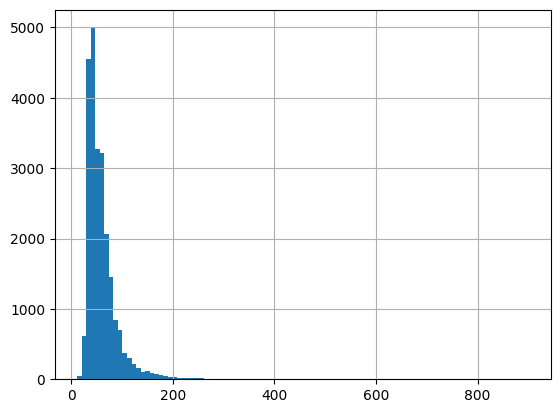

In [76]:
data['total_area'].hist(bins=100) # гистограмма для столбца 'total_area'
print((data['total_area'].describe()).round(2)) # получение списка характерных значений

Cреднее значение площади - 60,32 кв.м., медиана - 52,0 кв.м. На гистограмме видно тонкий длинный "хвост" справа, что объясняется редкими очень большми значениями. Как мы видим, максимальная площадь квартиры составляет 900 кв.м.

Построим диаграмму размаха методом `boxplot`.

<Axes: >

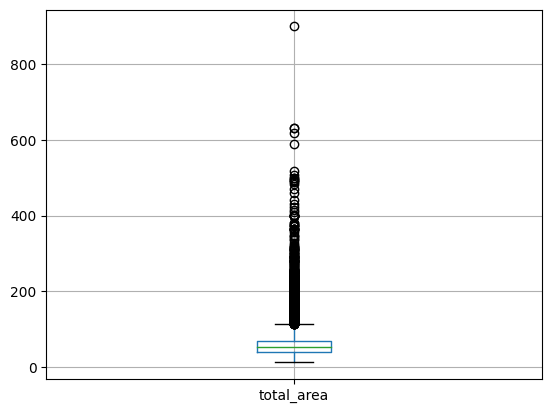

In [77]:
data.boxplot('total_area') # построение диаграммы размаха

Ориентировочная граница нормального размаха заканчивается на значении около 120 кв.м. Все что выше этого значения можно назвать выбросом.

In [78]:
len(data.query('total_area > 120')) # подсчет значений больше 120кв.м.


1055

In [79]:
(data['total_area'] > 120).mean()

0.044769785699130066

Таких значений в выборке 1029, что соответствует 4,48% таблицы.

Изменяя параметр `range`, построим гистограммы и рассмотрим распределение для разных диапазонов.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

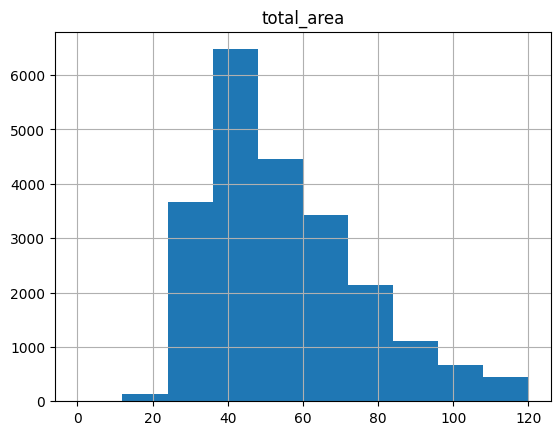

In [80]:
data.hist('total_area', bins=10, range = (0, 120)) # гистограмма для столбца 'total_area' в залданном диапазоне

После отсечения "хвоста" из редких значений распределение стало напоминать нормальное. Слева от пика есть редкие значения меньше 20 кв.м., рассмотрим их отдельно.

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

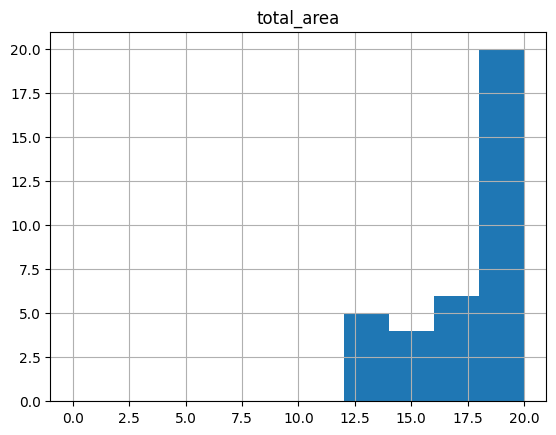

In [81]:
data.hist('total_area', bins=10, range = (0, 20)) # гистограмма для столбца 'total_area'  в залданном диапазоне

Нормами СНиП минимальный размер квартиры не регламинтирован. В п 5.2. СП 54.13330.2016 "Здания жилые многоквартирные"  даны рекомендации о минимальные площади квартир в многоквартирных зданиях государственного жилищного фонда: 28-38 кв.м. Данный СП 54.13330.2016 "Здания жилые многоквартирные", дает точные показатели для квартир государственного жилищного фонда. Площади же квартир коммерческого назначения могут значительно варьироваться в зависимости от задания на проектирование, которое составляет сам застройщик. Кроме того, п.5.7 этого же документа регламинтируем минимальные размеры помещений: общей жилой комнаты в однокомнатной квартире - 14 кв.м., кухни или кухни-ниши - не менее 5 кв.м.в однокомнатных квартирах. Таким образом не менее 19 кв.м., без учета санузла. Для целей нашего ислледования, будем считать, что площадь квартир менее 22 кв.м. является аномальной.

In [82]:
len(data.query('total_area < 22')) # подсчет числа квартир с площадью меньше 22 кв.м.

60

Можем предположить, что квартиры с маленькой площадью относятся к типам недвижимости аппартаменты, свободная планировка, или студия. 

In [83]:
data.query('total_area < 22 and (is_apartment == True or open_plan == True or studio == True)') # формирование среза

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter,weekday,month,year,floor_categ,ratio_living_total,ratio_kitchen_total
716,5,1500.00,17.0,2017-06-07,0,2.70,9,12.000000,1,False,True,False,5.0,0,посёлок Шушары,18654.0,29846.0,0.0,,0.0,,40.0,88.235294,2,6,2017,Первый,0.705882,0.294118
1608,12,2150.00,20.1,2019-01-30,1,NaN,9,8.784022,1,True,False,False,11.7,0,Санкт-Петербург,26646.0,12147.0,0.0,,0.0,,13.0,106.965174,2,1,2019,Первый,0.437016,0.582090
3874,13,1700.00,21.4,2015-02-11,0,2.70,3,9.352143,2,False,True,False,5.0,0,Всеволожск,26763.0,NaN,0.0,,0.0,,NaN,79.439252,2,2,2015,Другой,0.437016,0.233645
5312,3,1800.00,20.0,2018-02-01,0,NaN,19,16.000000,10,False,True,False,5.0,0,деревня Кудрово,26763.0,NaN,0.0,,0.0,,53.0,90.000000,3,2,2018,Другой,0.800000,0.250000
5855,3,945.75,19.5,2017-09-18,0,2.76,3,12.700000,2,False,True,False,5.0,0,поселок городского типа Дубровка,26763.0,NaN,0.0,,0.0,,3.0,48.500000,0,9,2017,Другой,0.651282,0.256410
8271,11,2300.00,21.3,2018-03-16,0,NaN,22,18.000000,1,False,True,False,5.0,2,посёлок Мурино,26763.0,NaN,0.0,,0.0,,56.0,107.981221,4,3,2018,Первый,0.845070,0.234742
8454,7,2250.00,19.0,2019-03-12,0,3.00,6,8.303305,2,False,True,False,5.0,0,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0,118.421053,1,3,2019,Другой,0.437016,0.263158
8755,1,1350.00,18.8,2017-11-22,0,2.75,19,15.800000,1,False,True,False,5.0,0,Санкт-Петербург,37636.0,14479.0,0.0,,1.0,1127.0,128.0,71.808511,2,11,2017,Первый,0.840426,0.265957
8886,10,2450.00,15.5,2018-08-22,0,NaN,5,10.000000,2,False,True,False,5.0,0,Санкт-Петербург,24326.0,4589.0,0.0,,1.0,446.0,27.0,158.064516,2,8,2018,Другой,0.645161,0.322581
9412,5,2100.00,16.0,2017-12-10,0,NaN,6,13.000000,1,False,False,True,0.0,0,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0,131.250000,6,12,2017,Первый,0.812500,0.000000


In [84]:
len(data.query('(is_apartment == True or open_plan == True or studio == True)')) # подсчет квартир с выбранной планировкой

263

Однако, в таких планировках всего 17 квартир с площадью меньше 22 кв.м. из 263.

Поместим в переменную `new_data` срез таблицы `data`, очищенный от выбросов.

In [85]:
new_data = data.query('22 < total_area < 120') # создание нового датафрейма из среза 

array([[<Axes: title={'center': 'total_area'}>]], dtype=object)

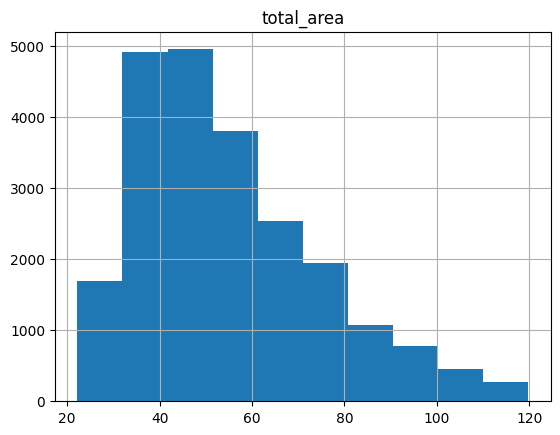

In [86]:
new_data.hist('total_area', bins=10) # гистограмма для столбца 'total_area'

#### Цена

Построим гистограмму и выведем список характерных значений стоимости продажи квартиры.

count     23565.00
mean       6540.06
std       10910.93
min          12.19
25%        3400.00
50%        4646.00
75%        6790.00
max      763000.00
Name: last_price, dtype: float64


<Axes: >

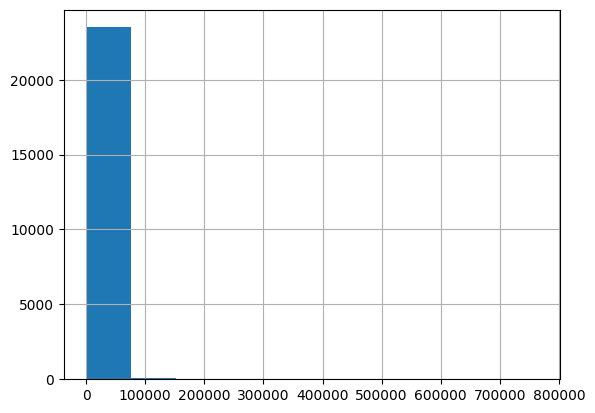

In [87]:
print((data['last_price'].describe()).round(2))  # получение списка характерных значений
data['last_price'].hist() # гистограмма для столбца 'last_price'

На графике все значения сгруппировались в одной колонке в левой части графика. Это связано с редкими, но очень большими значениями стоимости сделки. Максимальная цена продажи - 763 000 тыс.руб.

Построим диаграмму размаза для значений цены менее 70000 тыс. руб., т.к. на предыдущей гистограмме основная масса значений расположена примерно в этом диапазоне.

<Axes: >

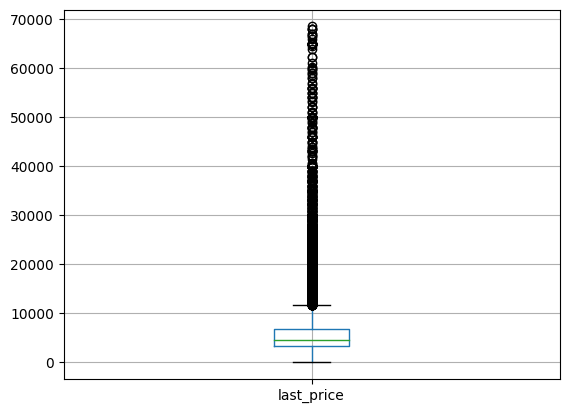

In [88]:
data.query('last_price<70000').boxplot('last_price') # построение диаграммы размаха

По графику видно, что нормальные значения располагаются примерно до 12 000 тыс. руб. Все что выше этой отметки можно считать выбросами. 

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

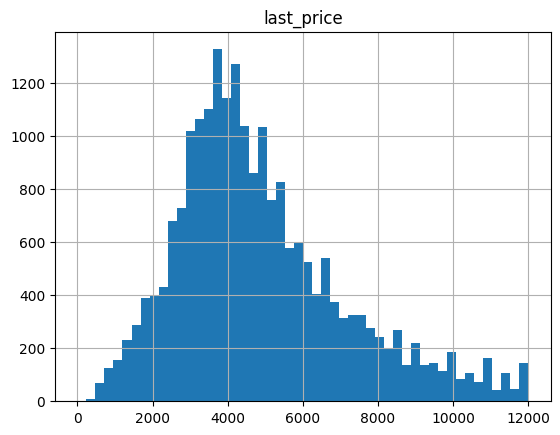

In [89]:
data.hist('last_price', bins=50, range = (0, 12000))  # гистограмма для столбца 'last_price' в диапазоне от 0 до 12 000 тыс.руб.

В результате прстроения гистограммы мы видим распределение, тяготеющее к нормальному. .

array([[<Axes: title={'center': 'last_price'}>]], dtype=object)

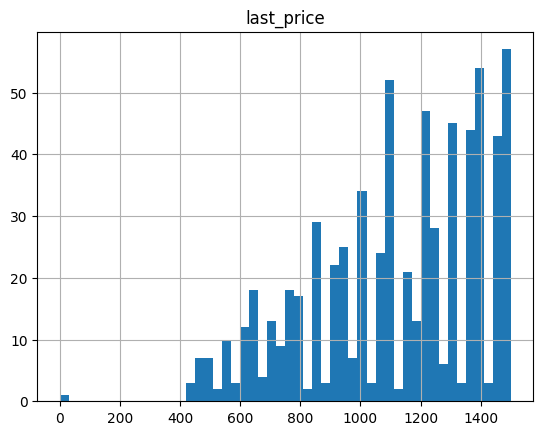

In [90]:
data.hist('last_price', bins=50, range = (0, 1500))  # гистограмма для столбца 'last_price' в диапазоне от 0 до 1 500 тыс.руб.

Обновим `new_data` с учетом новых условий: исключим строки таблицы, в которых цена менее 400 тыс.руб. и более 12000 тыс. руб.

In [91]:
new_data = new_data.query('400 < last_price < 12000') # обновление датафрейма new_data


count    21367.00
mean      4837.43
std       2211.47
min        430.00
25%       3300.00
50%       4400.00
75%       5990.00
max      11999.00
Name: last_price, dtype: float64


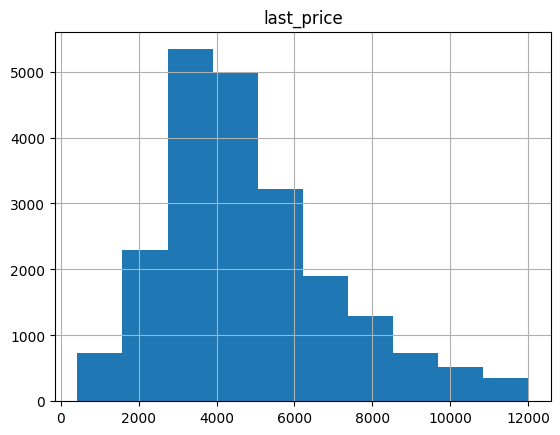

In [92]:
new_data.hist('last_price') # гистограмма для столбца 'last_price' 
print((new_data['last_price'].describe()).round(2))  # получение списка характерных значений

#### Количество комнат

Построим гистограмму для столбца `'rooms'`.

<Axes: >

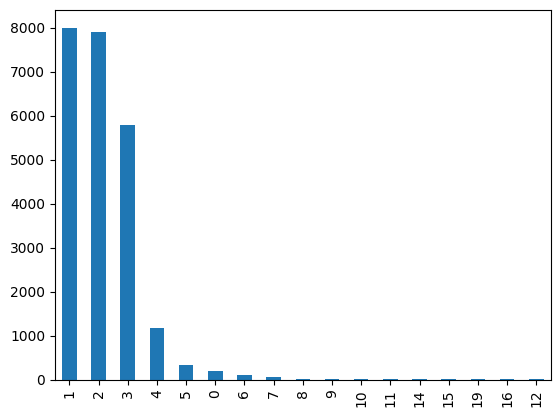

In [93]:
data['rooms'].value_counts().plot(kind='bar') # гистограмма для столбца 'rooms'

С помощью метода `value_counts()` просмотрим список уникальных значений.

In [94]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

В выборке есть квартиры с аномально большим числом комнат - от семи до 19.

<Axes: >

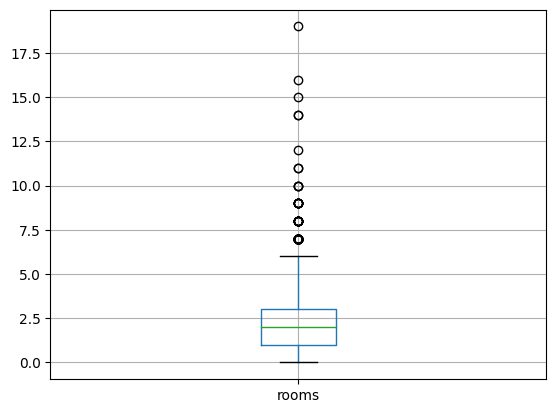

In [95]:
data.boxplot('rooms') # построение диаграммы размаха

Как мы и предполагали, диаграмма размаха показывает, что выбросы начинаются после значения числа комнат равном шести.

array([[<Axes: title={'center': 'rooms'}>]], dtype=object)

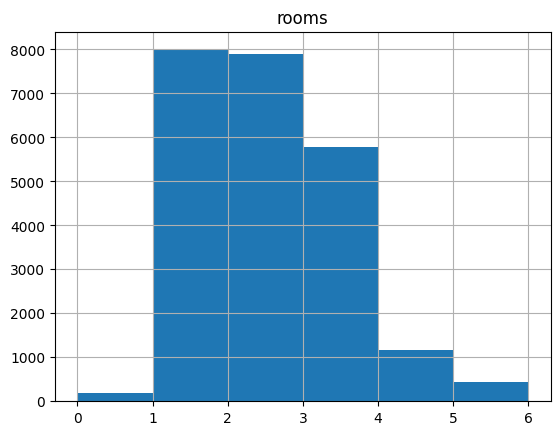

In [96]:
data.hist('rooms', bins=6, range = (0, 6)) # гистограмма для столбца 'rooms' 

Кроме того, в таблице присутствуют квартиры, в которых 0 комнат.

Предположим что 197 квартир с числом комнат равным 0, это студии или квартиры со свободной планировкой. Чтобы убедиться в этом, выведем срез, который по предположению должен вернуть нам 197 строк.

In [97]:
data.query('rooms == 0 and (open_plan == True or studio == True)') # построение среза по количеству комнат и типу планировки

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,cost_square_meter,weekday,month,year,floor_categ,ratio_living_total,ratio_kitchen_total
144,1,2450.0,27.00,2017-03-30,0,NaN,24,15.500000,2,False,True,False,5.0,2,посёлок Мурино,26763.0,NaN,0.0,,0.0,,181.0,90.740741,3,3,2017,Другой,0.574074,0.185185
349,4,2320.0,25.00,2017-09-27,0,NaN,14,17.000000,1,False,False,True,0.0,0,деревня Кудрово,26763.0,NaN,0.0,,0.0,,45.0,92.800000,2,9,2017,Первый,0.680000,0.000000
440,8,2480.0,27.11,2018-03-12,0,NaN,17,24.750000,4,False,True,False,5.0,2,Санкт-Петербург,38171.0,15015.0,0.0,,2.0,982.0,64.0,91.479159,0,3,2018,Другой,0.912947,0.184434
508,0,3375.0,34.40,2017-03-28,0,NaN,26,24.300000,19,False,False,True,0.0,1,посёлок Парголово,53115.0,19292.0,0.0,,1.0,593.0,430.0,98.110465,1,3,2017,Другой,0.706395,0.000000
608,2,1850.0,25.00,2019-02-20,0,NaN,10,10.925401,7,False,True,False,5.0,0,посёлок Шушары,17427.0,24212.0,0.0,,0.0,,29.0,74.000000,2,2,2019,Другой,0.437016,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200.0,26.00,2017-09-01,0,NaN,25,18.000000,16,False,True,False,5.0,0,Санкт-Петербург,11405.0,13222.0,0.0,,1.0,623.0,14.0,123.076923,4,9,2017,Другой,0.692308,0.192308
23442,0,2500.0,27.70,2017-09-28,0,NaN,24,18.000000,4,False,False,True,0.0,2,посёлок Мурино,26763.0,NaN,0.0,,0.0,,4.0,90.252708,3,9,2017,Другой,0.649819,0.000000
23554,15,3350.0,26.00,2018-09-07,0,NaN,19,11.362417,8,False,True,False,5.0,0,Санкт-Петербург,18090.0,17092.0,0.0,,2.0,112.0,31.0,128.846154,4,9,2018,Другой,0.437016,0.192308
23592,10,1450.0,29.00,2017-11-11,0,NaN,9,18.000000,8,False,False,True,0.0,2,Никольское,26763.0,NaN,0.0,,0.0,,82.0,50.000000,5,11,2017,Другой,0.620690,0.000000


Мы получили 197 строк, значит число комнат равное нулю не является ошибкой, а особенность планировки квартиры.

Отбросим выбивающиеся значения, используя метод `query` и сохраним результат в переменную `new_data`.

<Axes: >

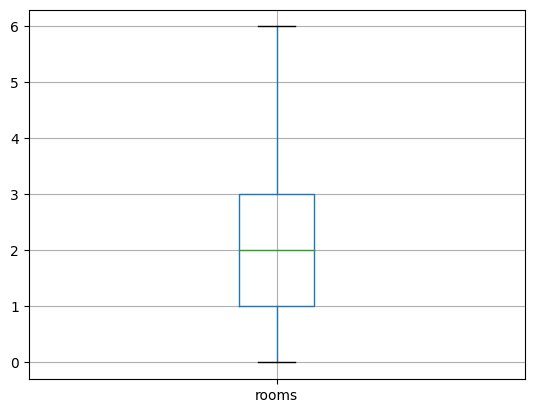

In [98]:
new_data = new_data.query('rooms < 7') # построение среза и запись результата в переменную new_data
new_data.boxplot('rooms') # построение диаграммы размаха

В таблице остались нормальные значения количества комнат.

#### Высота потолков

Потроим гистограмму, которая покажет распределение значений высоты потолков.

<Axes: >

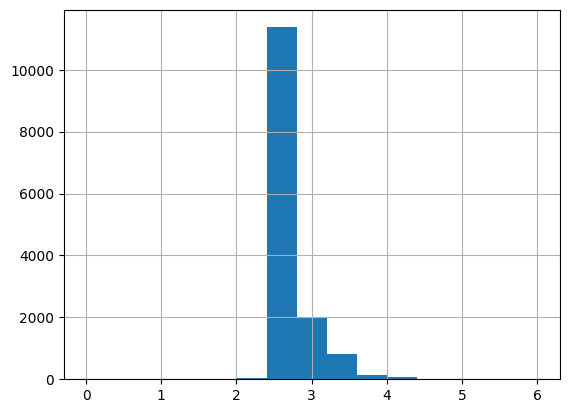

In [99]:
data['ceiling_height'].hist(bins=15, range = (0, 6)) # гистограмма для столбца 'ceiling_height'

С помощью метода `describe` получим список характерных значений.

In [100]:
print(data['ceiling_height'].describe().round(2))  # получение списка характерных значений

count    14481.00
mean         2.77
std          1.26
min          1.00
25%          2.51
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64


Среднее значение составляет 2,72 м., медиана - 2,65 м. Но мы видим, что в списке значений есть аномалии: это минимальное и максимальное значения. Минимальная высота потолка определяется СНиП как 2,5 м. Максимальная высота не ограничена. Построим диаграмму размаха, рассмотрим как распределились аномальные значения и их количество.

<Axes: >

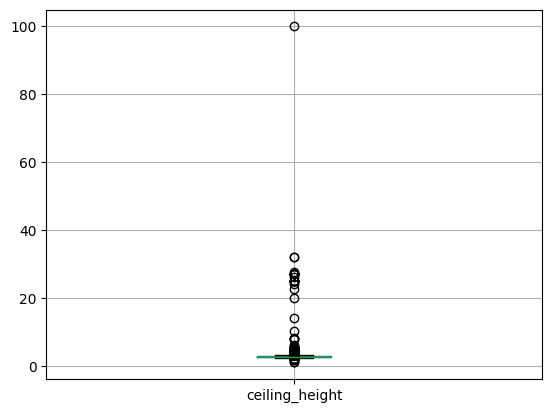

In [101]:
data.boxplot('ceiling_height') # построение диаграммы размаха

График сжат, из за выдающихся высоких значений.

Рассмотрим значения меньше 2,5 м., для этого построим гистограмму в диапазоне от 1 до 2,4 м.

<Axes: >

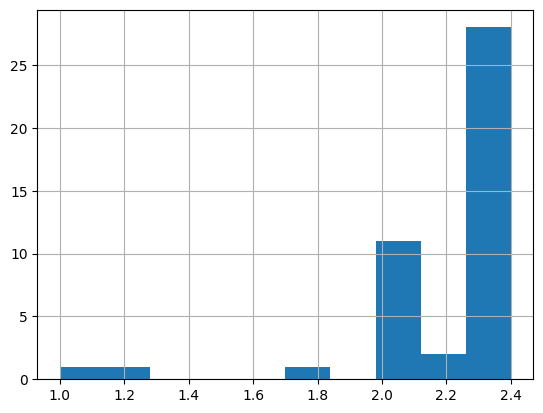

In [102]:
data['ceiling_height'].hist(bins=10, range = (1, 2.4)) # гистограмма для столбца 'ceiling_height'

Несколько значений с высотой пололка менее 2х метров, и около 30 - с высотой 2,4 метра.

Избавимся от аномальных значений, заменим значения высоты потолка меньше 2,5м. и более 5,1м. на медианное значение.

In [103]:
# замена значений высоты потолка более 5,1 м. на медианное значение 
new_data.loc[new_data['ceiling_height'] > 5.1, 'ceiling_height'] = new_data['ceiling_height'].median()

In [104]:
new_data.loc[new_data['ceiling_height'] < 2.5, 'ceiling_height'] = new_data['ceiling_height'].median()

Снова построим диаграмму размаха. 

<Axes: >

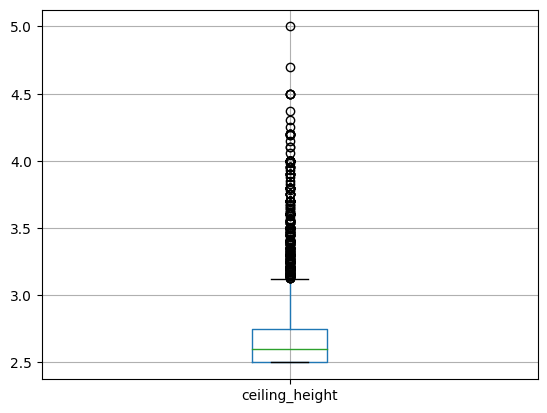

In [105]:
new_data.boxplot('ceiling_height') # построение диаграммы размаха

Теперь диаграмму можно рассмотреть, и стало понятно, что после значения около ~~2,8м~~. 3.1м. начинаются выбросы. Избавимся от оставшихся аномальных значений. Заменим на медиану все значения выше ~~2,8м.~~ 3.1м.

In [106]:
# замена значений высоты потолка более 3.1 м. на медианное значение 
new_data.loc[new_data['ceiling_height'] > 3.1, 'ceiling_height'] = new_data['ceiling_height'].median()

<Axes: >

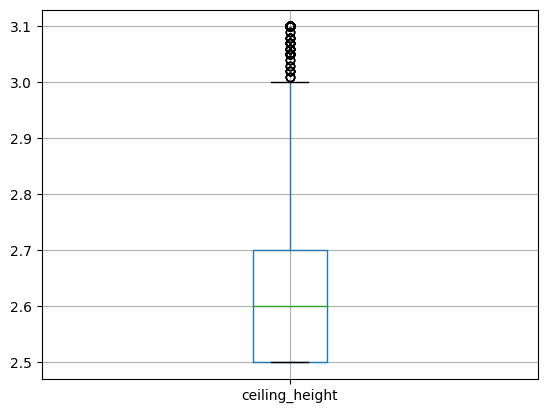

In [107]:
new_data.boxplot('ceiling_height') # построение диаграммы размаха

Построим новую гистограмму и выведем список характерных значений.

count    12994.000000
mean         2.646709
std          0.148759
min          2.500000
25%          2.500000
50%          2.600000
75%          2.700000
max          3.100000
Name: ceiling_height, dtype: float64


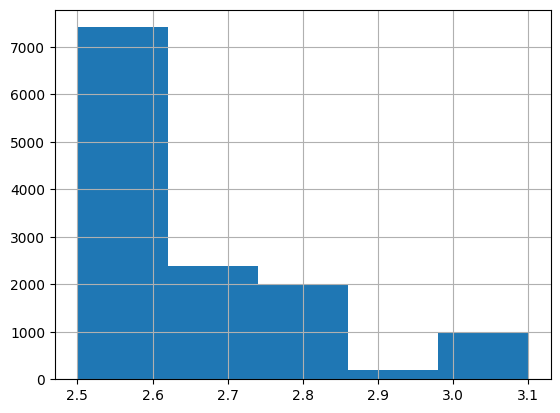

In [108]:
new_data['ceiling_height'].hist(bins=5,) # гистограмма для столбца 'ceiling_height'
print(new_data['ceiling_height'].describe()) # получение списка характерных значений

Высота потолков теперь варьируется в диапазоне от 2,5 до 3,1 метров.

### Изучение времени продажи квартиры

Посмотрим распределение времени продажи квартир.

count    20394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max       1580.00
Name: days_exposition, dtype: float64


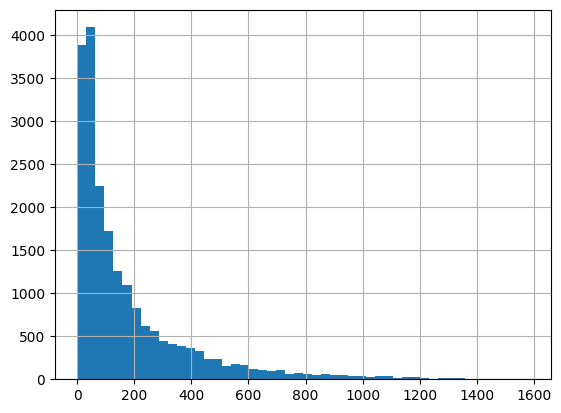

In [109]:
data['days_exposition'].hist(bins=50) # гистограмма для столбца 'days_exposition'
print((data['days_exposition'].describe()).round(2)) # получение списка характерных значений

В среднем квартира продается за 180 дней, при этом медианное значение меньше в два раза  - 95 дней. Продажи, которые заняли менее 45 дней можно назвать быстрыми, все что выше 231 дня - долгими. Разница между средим и медианой говорит о том, что в распределении есть длинный "хвост"
с высокими значениями или несколько очень больших значений. Об этом же говорит и высокое стандартное отклонение. Максимальное значение дней продажи составляет 1580 дней, т.е. более 4х лет.

Построим диаграмму в диапазоне от 0 до 200 дней продажи.

<Axes: >

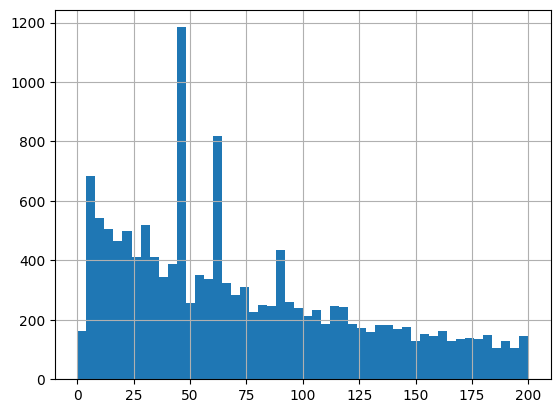

In [110]:
data['days_exposition'].hist(bins=50, range=(0, 200)) # гистограмма для столбца 'days_exposition'
                                                                                            

На графике видно несколько выбивающихся пиков ориентировочно на 45 и 60 дней продажи.  Вероятно это объявления по которым истек срок публикации и объявления были сняты автоматически.

Посмотрим распределение на диаграмме размаха.

<Axes: >

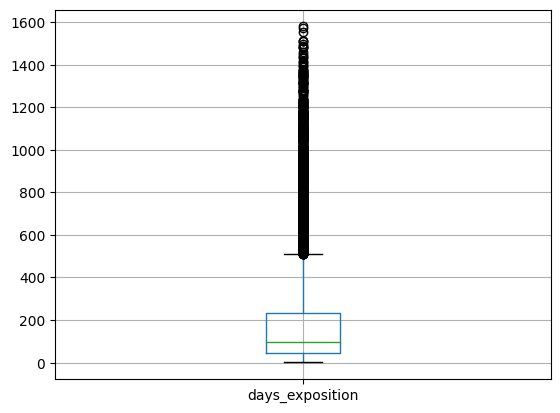

In [111]:
data.boxplot('days_exposition') # построение диаграммы размаха

Нижний «ус» упирается в минимальное значение. Верхний заканчивается около 500 дней — это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов очень много.

Очистим таблицу `new_data` от выбросов в столбце `days_exposition`: отбросим значения более 500 дней, а также выбивающиеся пики на 45 и 60 дней продаж.

In [112]:
new_data['days_exposition'] = new_data['days_exposition'].round(1) # округление столбца 'days_exposition'

In [113]:
new_data = new_data.query('days_exposition < 500 and (days_exposition not in [45, 60])') # формирование среза и запись результата  
                                                                                         # в переменную new_data


<Axes: >

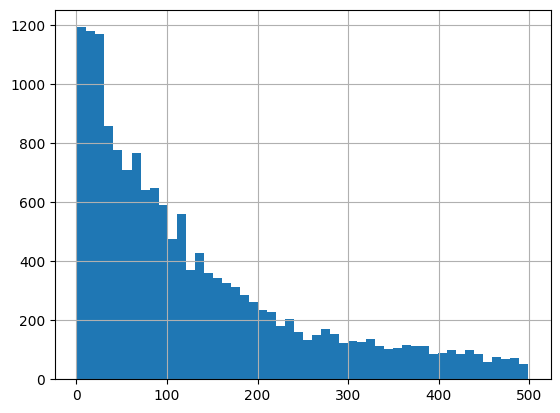

In [114]:
new_data['days_exposition'].hist(bins=50) # гистограмма для столбца 'days_exposition'

In [115]:
print((new_data['days_exposition'].describe()).round(2)) # получение списка характерных значений

count    15908.00
mean       130.62
std        120.74
min          1.00
25%         35.00
50%         91.00
75%        189.00
max        499.00
Name: days_exposition, dtype: float64


### Выявление факторов, влияющих на стоимость квартиры

#### Зависимость цены от площади

Построим график зависимости цены от площади.

<Axes: xlabel='total_area', ylabel='last_price'>

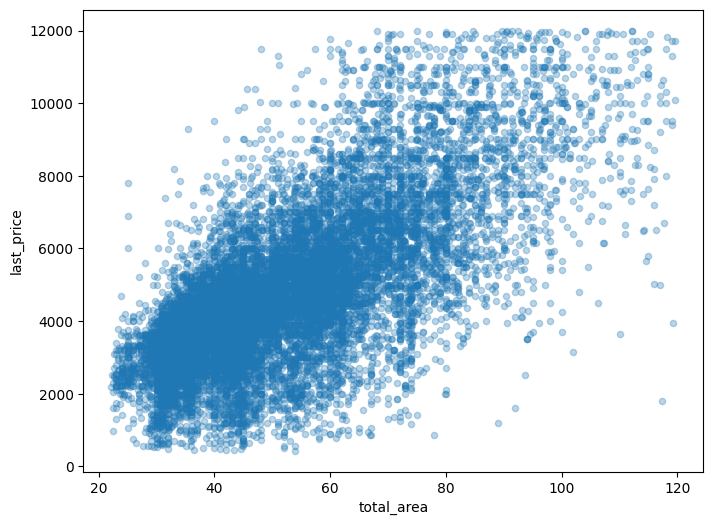

In [116]:
# построение графика по данным сводной таблицы 
new_data.plot(x='total_area',  y='last_price', kind='scatter', alpha=0.3, figsize=(8, 6))


График показывает, что с увеличением площали увеличивается и стоимость. Однако есть редкие выбивающиеся значения.

In [117]:
print((new_data['total_area'].corr(new_data['last_price'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.71


Коэффициент корреляции равный 0,7 указывает на наличие линейной связи между ценой и площадью квартиры.

#### Зависимость цены от числа комнат

Методом `pivot_table` сгруппируем данные таблицы по столбцу `rooms` и найдем медианное значение стоимости квартир. Методом `plot` построим график, который отразит полученные расчеты графически.

<Axes: xlabel='rooms'>

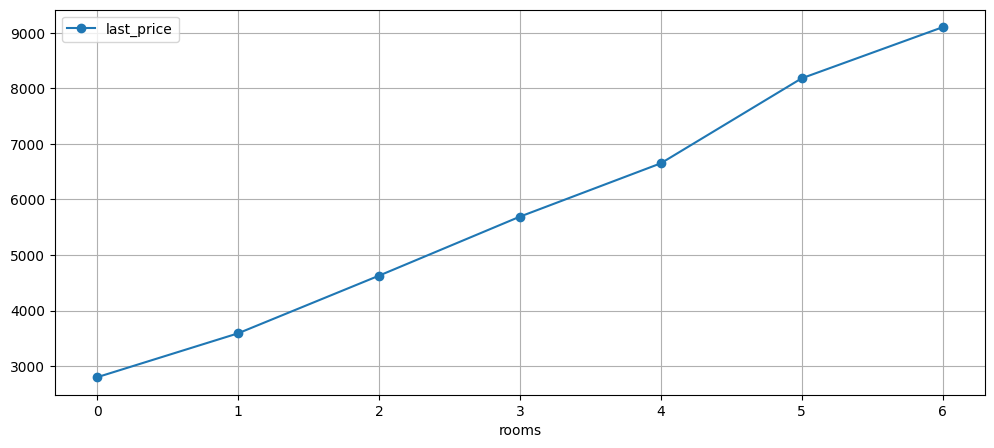

In [118]:
# построение графика по данным сводной таблицы 
(new_data
 .pivot_table(index='rooms',  values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(12, 5))
)

График показал прямую зависимость цены от количества комнат: чем больше комнат, тем дороже цена продажи. Стоимость однокомнатных квартир начинается от 3 500 тыс. руб., двухкомнатных от 4 500 тыс. руб. и далее по возрастанию. 

In [119]:
print((new_data['rooms'].corr(new_data['last_price'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.45


Коэффициент корреляции равный 0,44 говорит о наличии связи, но не очень сильной.

#### Зависимость цены от удаленности от центра 

Построим график зависимости цены от удаленности от центра.

<Axes: xlabel='city_centers_nearest', ylabel='last_price'>

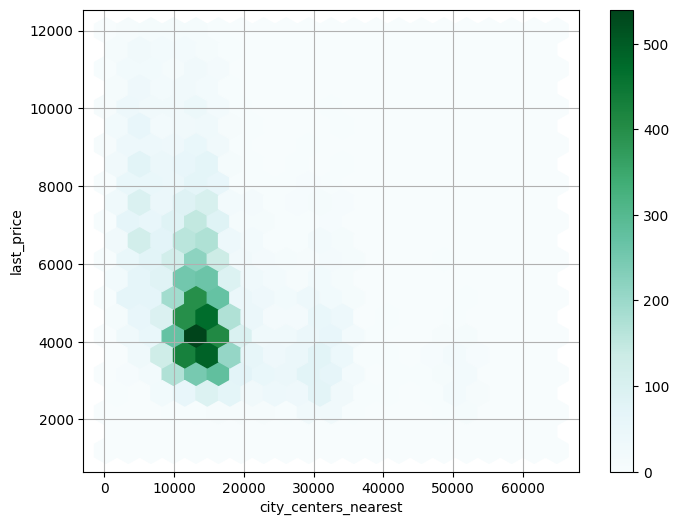

In [120]:
# построение графика
(new_data
 .plot(x='city_centers_nearest', y='last_price',  kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
)

На графике видна повышенная частота сочетаний: квартиры расположенные в 10-20 км. от центра стоят около 3000-~~4000~~ 6000 тыс. руб. В остальных случаях закономерность не прослеживается.


Найдем коэффициент корреляции Пирсона, применив метод `corr`.

In [121]:
print((new_data['city_centers_nearest'].corr(new_data['last_price'])).round(2)) # рассчет коэффициента корреляции Пирсона

-0.35


Коэффициент Пирсона составляет -0.35, это может означать что линейная связь слабая либо отсутствует вовсе, или же у связи более сложный, не линейный характер

#### Зависимость цены от этажа 

Построим график зависимости цены от категории этажа. Для этого методом `pivot_table` сгруппируем данные таблицы по столбцу `floor_categ` и посчитаем медианное значение цены для каждой категории.

<Axes: xlabel='floor_categ'>

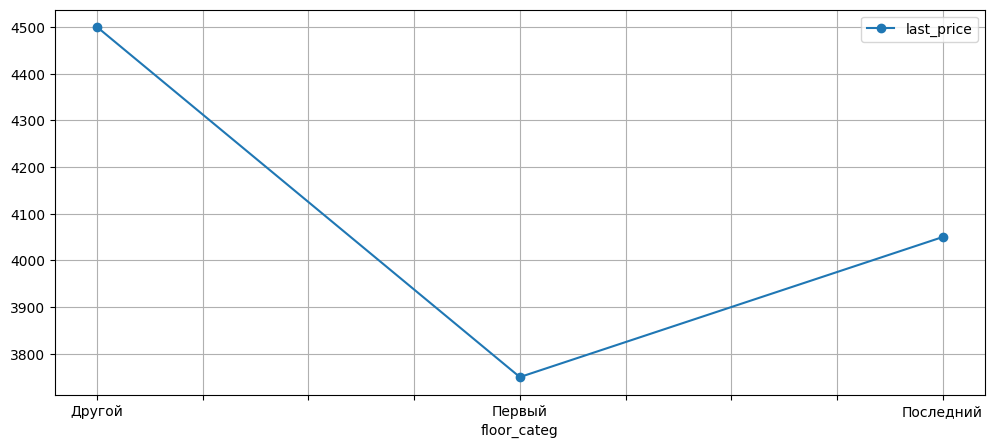

In [122]:
# построение графика по данным сводной таблицы
(new_data
 .pivot_table(index='floor_categ',  values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, figsize=(12, 5))
)

График показал, что медианное значение цены квартир на этажах категории "Другой", выше, чем на первом и последнем этажах. Дешевле всего продаются квартиры расположенные на первом этаже.

#### Зависимость цены от даты размещения объявления

<Axes: xlabel='weekday', ylabel='last_price'>

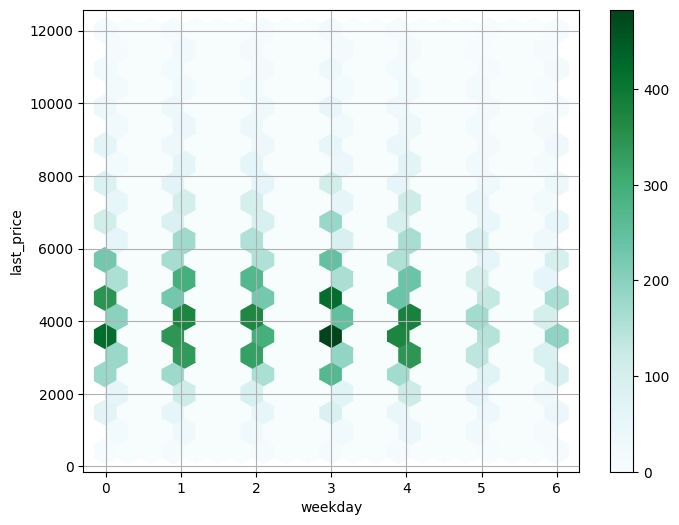

In [123]:
# построение графика
new_data.plot(x='weekday',  y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Глядя на график сложно выявить определенную закономерность. Найдем коэффициент Пирсона перед тем как сделать окончательный вывод.

In [124]:
print((new_data['weekday'].corr(new_data['last_price'])).round(2)) # рассчет коэффициента корреляции Пирсона

-0.01


Коэффициент практически равен нулю, что говорит о том, что зависимость между днем публикации, и ценой сделки не прослеживается.

Построим график зависимости стоимость от месяца публикации объявления.

<Axes: xlabel='month', ylabel='last_price'>

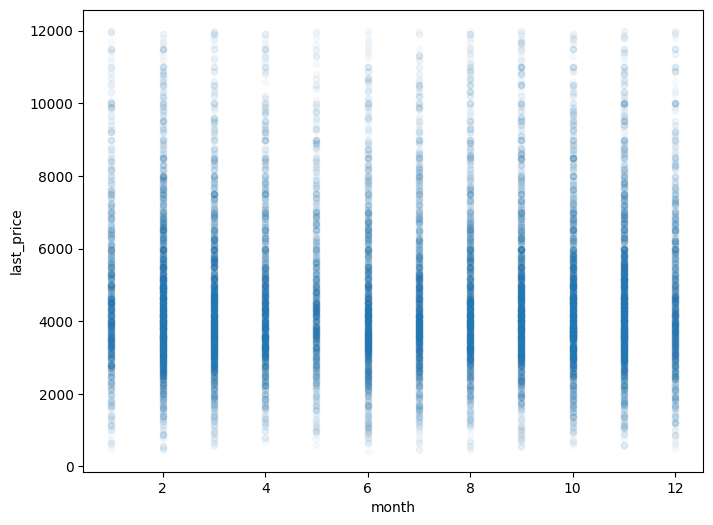

In [125]:
new_data.plot(x='month',  y='last_price', kind='scatter', alpha=0.03, figsize=(8, 6)) # построение графика

Зависимость не прослеживается, попробуем сгруппировать данные по месяцу подачи объявления и рассчитать медиану стоимости продажи, а затем построить график по этим данным.

<Axes: xlabel='month'>

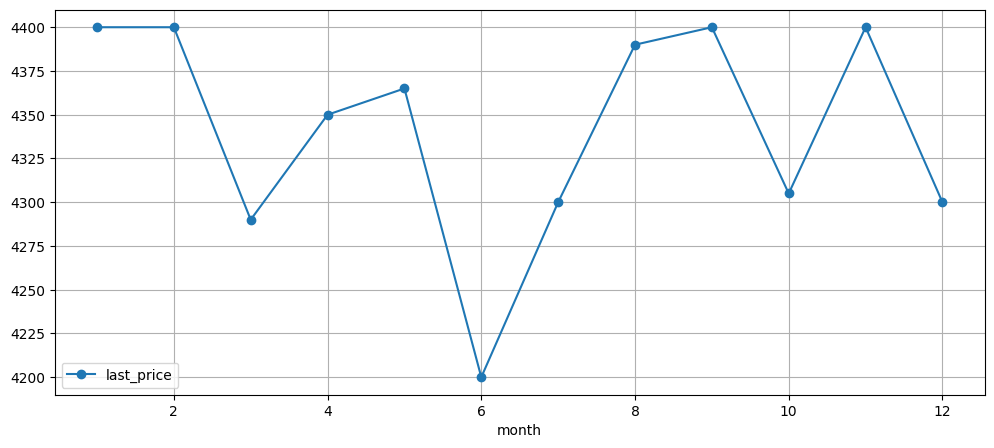

In [126]:
# построение графика по данным сводной таблицы
new_data.pivot_table(index='month',  values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(12, 5))

Медианные значения стоимости квартир, сформированные в зависимости от месяца продажи находятся в диапазоне от 4 100 тыс.руб. до 4 350 тыс. руб. Прямой зависимости между ценой продажи и месяцем публикации объявления нет. 

Попробуем найти зависимость между ценой и годом размещения объявления.

<Axes: xlabel='year', ylabel='last_price'>

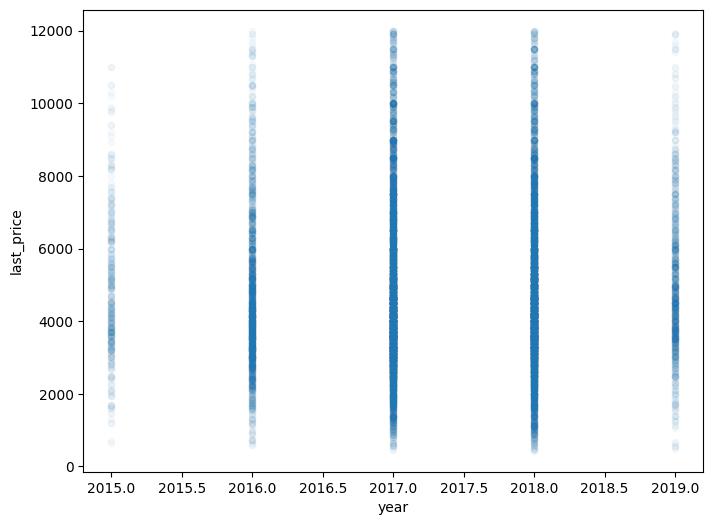

In [127]:
new_data.plot(x='year',  y='last_price',kind='scatter', alpha=0.03,  figsize=(8, 6)) # построение графика

<Axes: xlabel='year'>

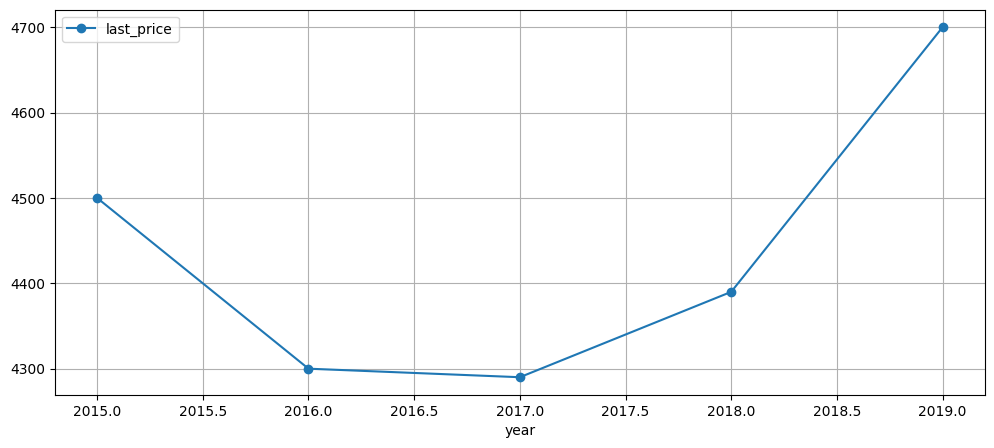

In [128]:
# построение графика по данным сводной таблицы
new_data.pivot_table(index='year',  values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(12, 5))

In [129]:
print((new_data['year'].corr(new_data['last_price'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.02


Сосгласно графика медианное значение стоимости квартир, по имеющимся данным, в период с 2015 по 2019гг. менялось незначительно. Коэффициент корреляции равен нулю.

#### Вывод

* Однозначно можно судить о том, что выявлена корреляция между ценой и площадью квартиры, а также между ценой и количеством комнат. 
* Категория этажа влияет на цену квартиры незначительно. Средняя цена квартиры на первом этаже на 700 тыс. руб. меньше, чем стоимость квартиры в категории этажа "Другой". 
* Исследование показало, что дата публикации объявления не влияет на стоимость квартиры.

### Задача №1

*Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.*

Используя сочетиние методов `value_counts().head(10)` выведем список 10 населенных пунктов с наибольшим числом объявлений.

In [130]:
new_data['locality_name'].value_counts().head(10) # получение 10 населенных пунктов с наибольшим числом объявлений

Санкт-Петербург      10412
посёлок Мурино         443
посёлок Шушары         347
Всеволожск             275
Колпино                257
посёлок Парголово      250
Пушкин                 244
деревня Кудрово        233
Гатчина                220
Выборг                 163
Name: locality_name, dtype: int64

Построим срез `new_data`, в котором отберем необходимые населенные пункты, и рассчитаем среднюю стоимость квадратного метра с помощью сводной таблицы.

In [131]:
(new_data[new_data['locality_name']  # расчет средней стоимости квадратного метра с помощью  pivot_table
          .isin(new_data['locality_name'].value_counts().head(10).index)]
 .pivot_table(index='locality_name', values='cost_square_meter', aggfunc='mean' )
 .sort_values(by='cost_square_meter', ascending=False)
)   

,cost_square_meter
locality_name,
Санкт-Петербург,104.553731
Пушкин,99.389588
деревня Кудрово,92.222085
посёлок Парголово,89.701409
посёлок Мурино,85.677493
посёлок Шушары,77.817269
Колпино,74.655260
Гатчина,67.927399
Всеволожск,66.617087


#### Вывод

Ожидаемо самая высокая стоимость квадратного метра в г.Санкт-Петербург	- 104.34 тыс.руб. За ним следуют г.Пушкин и дерявня Кудрово, в которых стоимость квадратного метра составляет 99,57 и 92,45 тыс. руб. соответственно. Ниже всего стоимость квадратного метра в Гатчине, Всеволжске и Выборге, и составляет менее 70 тыс. руб. за квадратный метр.

### Задание №2

*Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.*

Получим срез данных, в которых `locality_name == "Санкт-Петербург"`, запишем результат в новую таблицу `st_petersburg`.

In [132]:
st_petersburg = new_data.query('locality_name == "Санкт-Петербург"') # получение среза данных

Переведем значения столбца `city_centers_nearest` в километры и округлим до целых значений, запишем результат в новый столбец `distance_to_center`.

In [133]:
pd.set_option('chained_assignment', None)
st_petersburg['distance_to_center'] = st_petersburg['city_centers_nearest'] / 1000 # перевод значений столбца в километры

In [134]:
st_petersburg['distance_to_center'] = st_petersburg['distance_to_center'].round(0) # округление значений столбца 

In [135]:
st_petersburg['distance_to_center'].value_counts() # просмотр уникальных значений

12.0    1195
15.0    1169
13.0    1101
16.0     956
14.0     947
11.0     834
17.0     640
10.0     519
5.0      402
9.0      382
8.0      349
4.0      314
6.0      293
7.0      227
18.0     194
3.0      170
22.0     141
2.0      129
19.0     121
21.0      75
1.0       65
23.0      57
26.0      38
20.0      34
25.0      21
24.0      20
0.0        8
28.0       7
29.0       3
27.0       1
Name: distance_to_center, dtype: int64

<Axes: xlabel='distance_to_center'>

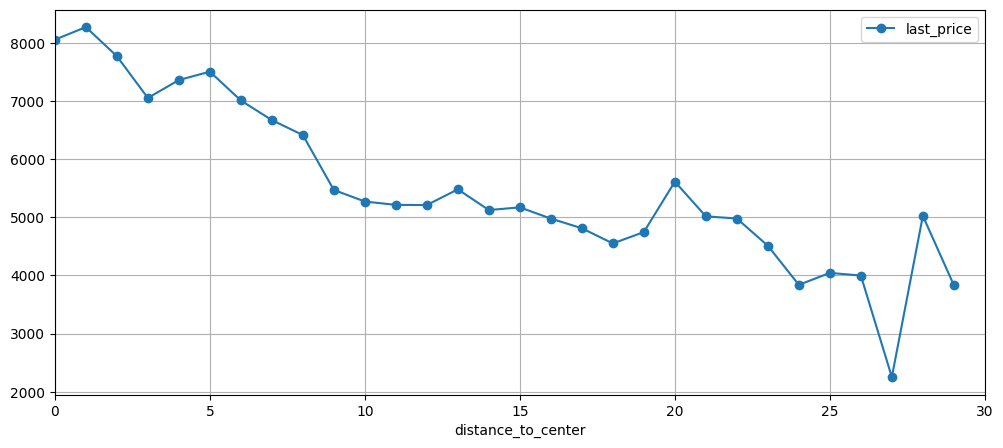

In [136]:
# построение графика зависимости цены от расстояния до центра
(st_petersburg
.pivot_table(index='distance_to_center', values='last_price', aggfunc='mean')
.plot(style='o-', grid=True, figsize=(12, 5), xlim=(0,30))
)

#### Вывод

По мере удаления от центра средняя цена квартир снижается. 
Средняя цена квартир в пределах от 9км до 20км. составляет около 5млн. руб. От восьми километров к центру и ближе заметен рост средней цены. Будем считать, что этот участок и есть центр города.

### Задание №3

*Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?*

Выделить квартиры, находящиеся в центре поможет условие для таблицы `st_petersburg` - `distance_to_center < 9`. Рассмотрим для квартир, находящихся в выделенной территории, следующие параметры: 
* площадь, 
* цена, 
* число комнат, 
* высота потолков. 

Для анализа построим гистограммы и список характерных значений. 

In [137]:
center_st_petersburg = st_petersburg.query('distance_to_center < 9')

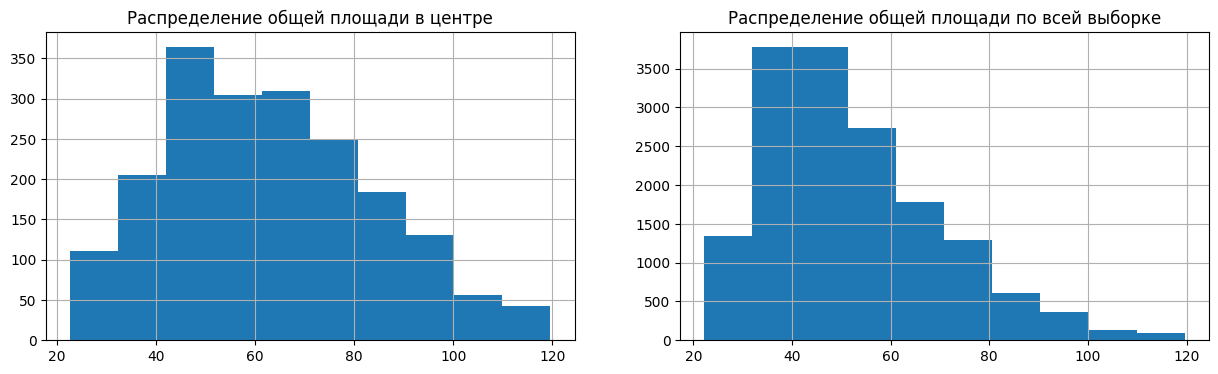

In [138]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
center_st_petersburg['total_area'].hist(bins=10, ax=axes[0]) # построение гистограммы
new_data['total_area'].hist(bins=10, ax=axes[1]) # гистограмма для столбца 'total_area'

axes[0].set_title('Распределение общей площади в центре')
axes[1].set_title('Распределение общей площади по всей выборке')

plt.show()


In [139]:
print((center_st_petersburg['total_area'].describe()).round(2))  # получение списка характерных значений

count    1957.00
mean       63.26
std        20.92
min        22.70
25%        46.00
50%        61.00
75%        78.00
max       119.60
Name: total_area, dtype: float64


Средняя площадь квартир в центре составляет 63,06 кв.м. 

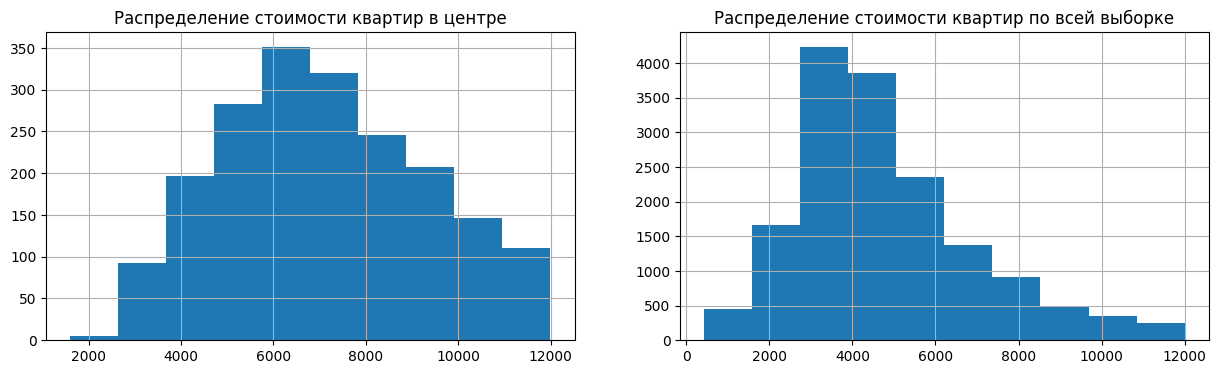

In [140]:
fig, axes = plt.subplots(1,2,figsize=(15,4))
center_st_petersburg['last_price'].hist(bins=10, ax=axes[0]) # построение гистограммы
new_data['last_price'].hist(bins=10, ax=axes[1]) # гистограмма для столбца 'last_price' 
axes[0].set_title('Распределение стоимости квартир в центре')
axes[1].set_title('Распределение стоимости квартир по всей выборке')

plt.show()

In [141]:
print((center_st_petersburg['last_price'].describe()).round(2))  # получение списка характерных значений

count     1957.00
mean      7126.65
std       2211.72
min       1600.00
25%       5400.00
50%       6900.00
75%       8700.00
max      11999.00
Name: last_price, dtype: float64


Средняя цена продажи квартиры в центре составляет 7100,69 тыс. руб., тогда как для всей выборки это значение составляет 4785.69 тыс. руб. 

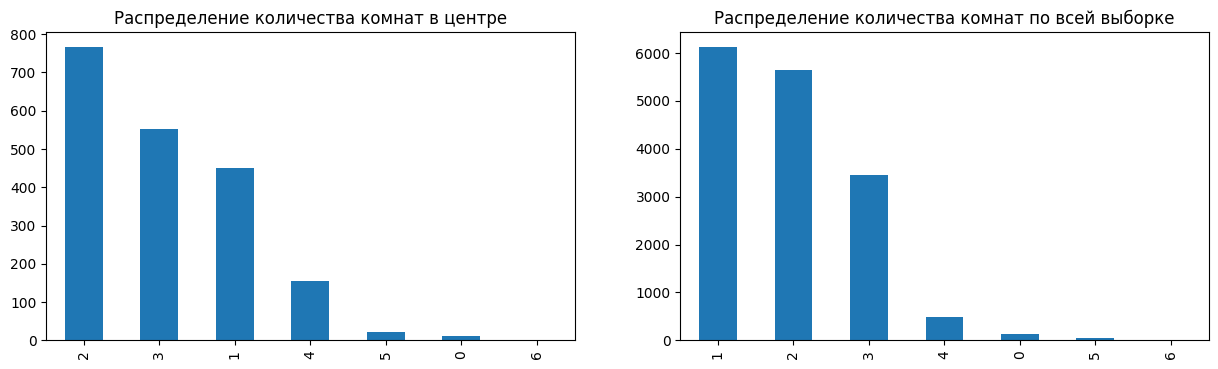

In [142]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

center_st_petersburg['rooms'].value_counts().plot(kind='bar', ax=axes[0])# построение гистограммы
new_data['rooms'].value_counts().plot(kind='bar', ax=axes[1]) 
axes[0].set_title('Распределение количества комнат в центре')
axes[1].set_title('Распределение количества комнат по всей выборке')

plt.show()

In [143]:
print((center_st_petersburg['rooms'].describe()).round(0))  # получение списка характерных значений

count    1957.0
mean        2.0
std         1.0
min         0.0
25%         2.0
50%         2.0
75%         3.0
max         6.0
Name: rooms, dtype: float64


Больше всего в центре продали двухкомнатных квартир. 5ти и 6ти комнатные квартиры скорее редкость, впрочем как и в целом для всей выборки.

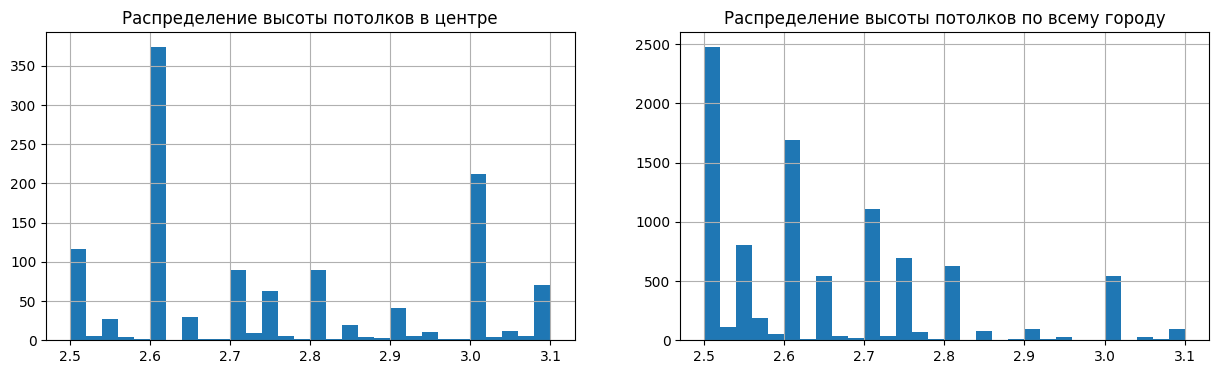

In [144]:
fig, axes = plt.subplots(1,2,figsize=(15,4))

center_st_petersburg['ceiling_height'].hist(bins=30, ax=axes[0])
new_data['ceiling_height'].hist(bins=30, ax=axes[1])

axes[0].set_title('Распределение высоты потолков в центре')
axes[1].set_title('Распределение высоты потолков по всему городу')

plt.show()

In [145]:
print((center_st_petersburg['ceiling_height'].describe()).round(2))  # получение списка характерных значений

count    1211.00
mean        2.75
std         0.19
min         2.50
25%         2.60
50%         2.70
75%         3.00
max         3.10
Name: ceiling_height, dtype: float64


Средняя высота потолков в центре составляет 2.75м.

#### Зависимость цены от площади

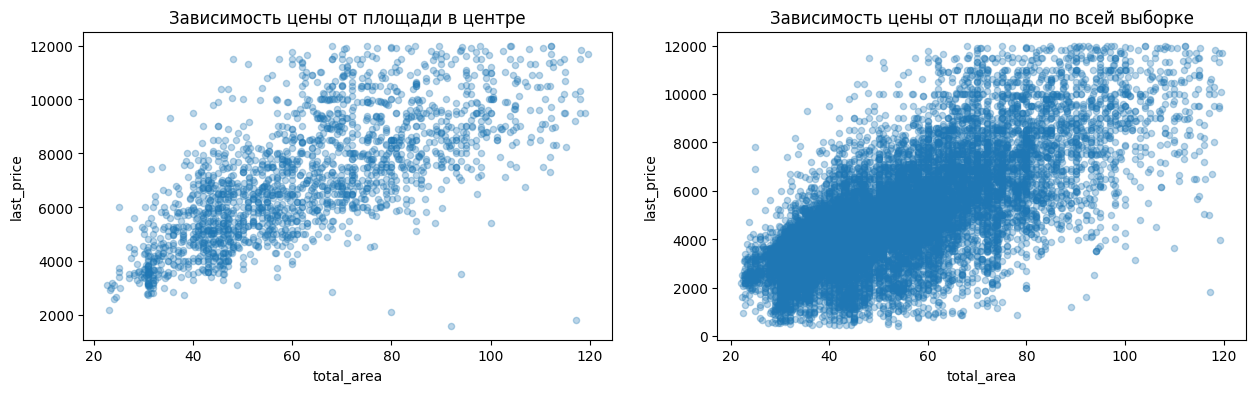

In [146]:
# построение графика
fig, axes = plt.subplots(1,2,figsize=(15,4))
center_st_petersburg.plot(x='total_area',  y='last_price', kind='scatter', alpha=0.3, ax=axes[0])
new_data.plot(x='total_area',  y='last_price', kind='scatter', alpha=0.3, ax=axes[1])
axes[0].set_title('Зависимость цены от площади в центре')
axes[1].set_title('Зависимость цены от площади по всей выборке')

plt.show()

По квартирам в центре мы видим такую же зависисмость цены от площади, как и по всей выборке вцелом.

In [147]:
print((center_st_petersburg['total_area'].corr(center_st_petersburg['last_price'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.71


####  Зависимость цены от количества комнат

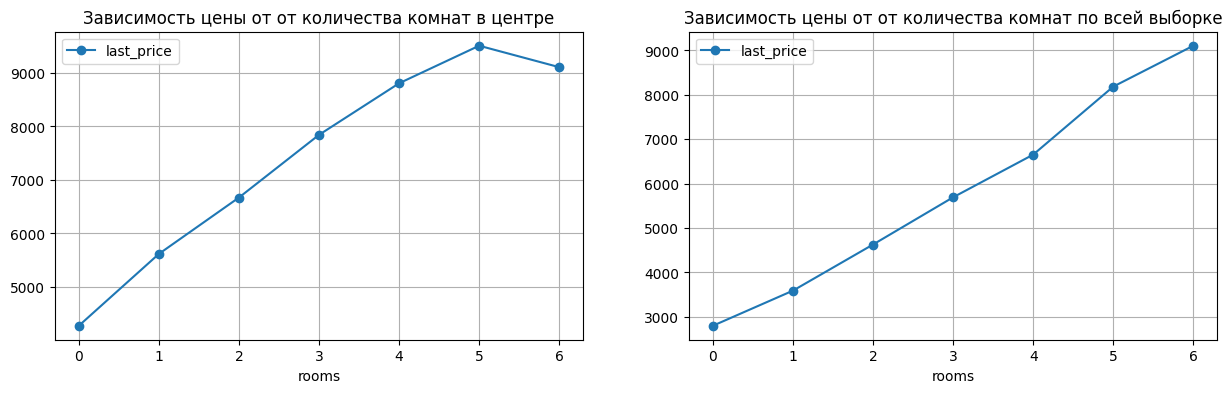

In [148]:
# построение графика 
fig, axes = plt.subplots(1,2,figsize=(15,4))
(center_st_petersburg
.pivot_table(index='rooms',  values='last_price', aggfunc='median')
.plot(style='o-', grid=True, ax=axes[0])
)
(new_data
 .pivot_table(index='rooms',  values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, ax=axes[1])
)
axes[0].set_title('Зависимость цены от от количества комнат в центре')
axes[1].set_title('Зависимость цены от от количества комнат по всей выборке')

plt.show()

Средняя стоимость квартир в центре возрастает с увеличением количества комнат, за исключением шестикомнатных квартир. На них эта закономерность не распространяется.

#### Зависимость цены от этажа 

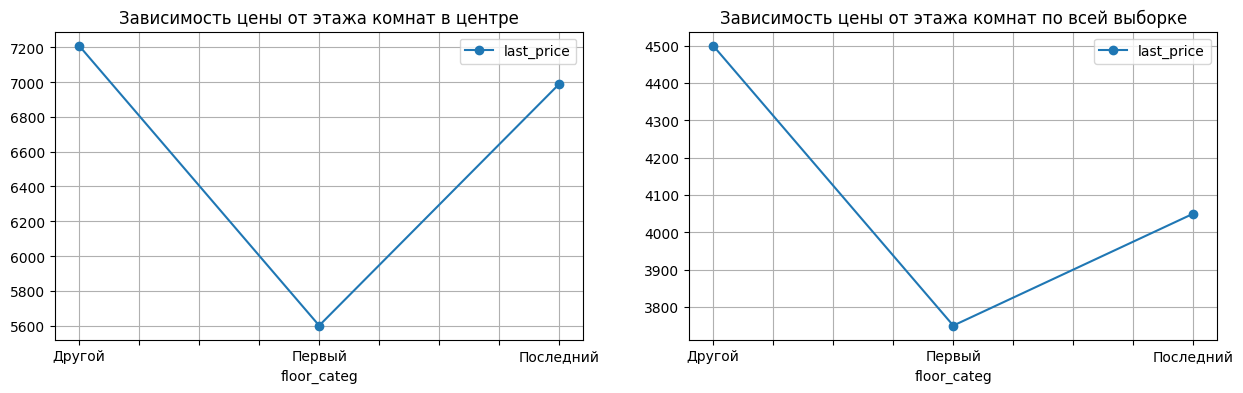

In [149]:
# построение графика
fig, axes = plt.subplots(1,2,figsize=(15,4))

(center_st_petersburg
 .pivot_table(index='floor_categ',  values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, ax=axes[0])
)

(new_data
 .pivot_table(index='floor_categ',  values='last_price', aggfunc='median')
 .plot(style='o-', grid=True, ax=axes[1])
)
axes[0].set_title('Зависимость цены от этажа комнат в центре')
axes[1].set_title('Зависимость цены от этажа комнат по всей выборке')

plt.show()

Также как и в исследовании по всей выборке, мы видим, что квартиры на первом этаже ценятся меньше. Однако, в центре города разница в средней стоимости между квартирой на первом этаже и "Другом" возрасла, и составляет 1,6 млн.руб. 

#### Зависимость цены от удаленности от центра 

<Axes: xlabel='city_centers_nearest', ylabel='last_price'>

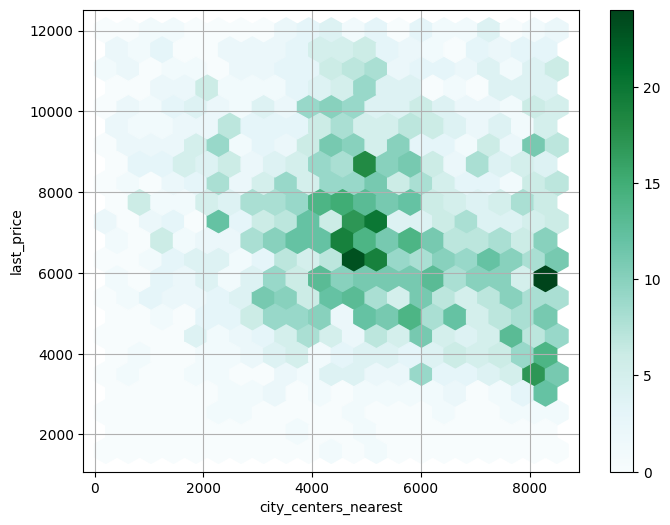

In [150]:
# построение графика
(center_st_petersburg
 .plot(x='city_centers_nearest', y='last_price',  kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
)

В центре графика заметна повышенная частота определённых сочетаний: при расстоянии от центра 4-6км. стоимость квартир варьируется от 6 до 8 млн.руб. В пределах 2км. от цента мало проданных квартир, в этой части график очень светлый. Это может объяняться тем, что в историческом центре города расположено меньше жилых домов, чем к примеру в спальных районах, соответсвенно там осуществляется меньше сделок. Однако нельзя сказать, что взаимосвязь сильная.

In [151]:
# рассчет коэффициента корреляции Пирсона
print((center_st_petersburg['city_centers_nearest'].corr((center_st_petersburg['last_price'])).round(2)))

-0.19


Коэффициент корреляции -0,19 может говорить об отсутствии связи, либо связь носит более сложный, нелинейный характер.

#### Зависимость цены от даты размещения объявления

<Axes: xlabel='weekday', ylabel='last_price'>

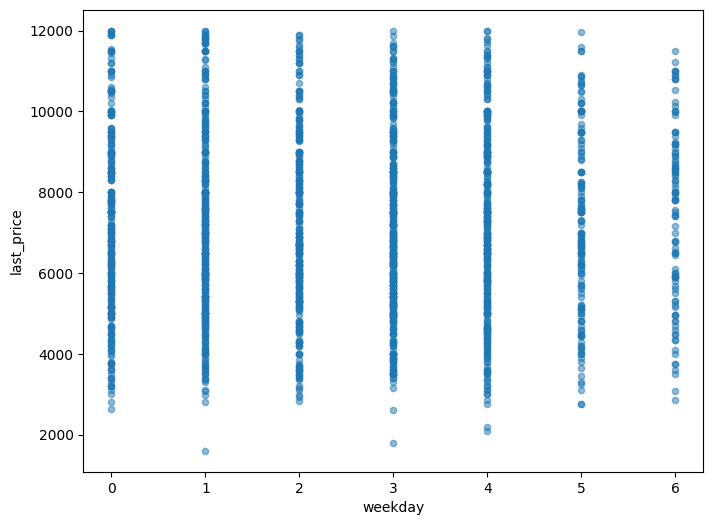

In [152]:
# построение графика
(center_st_petersburg
 .plot(x='weekday',  y='last_price',  kind='scatter', alpha=0.5, figsize=(8, 6))
)

График не показал зависимости стоимости продажи от дня недели публикации объявления.

<Axes: xlabel='month', ylabel='last_price'>

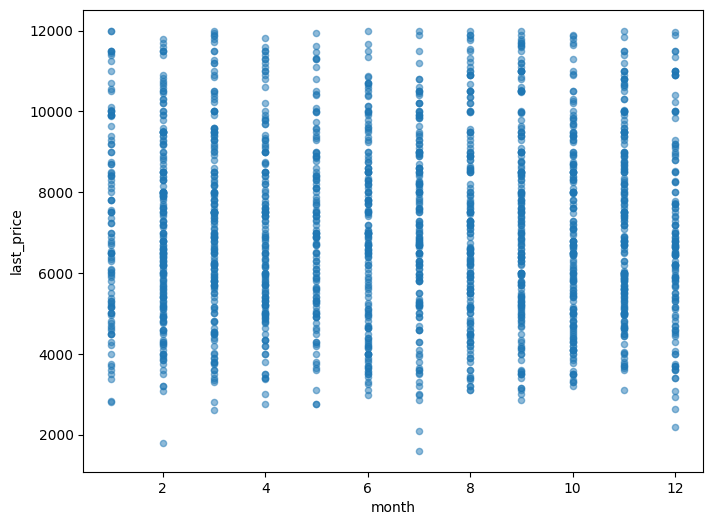

In [153]:
# построение графика
(center_st_petersburg
 .plot(x='month',  y='last_price', kind='scatter', alpha=0.5, figsize=(8, 6))
)

График не показал зависимости стоимости продажи от месяца публикации объявления.

<Axes: xlabel='year'>

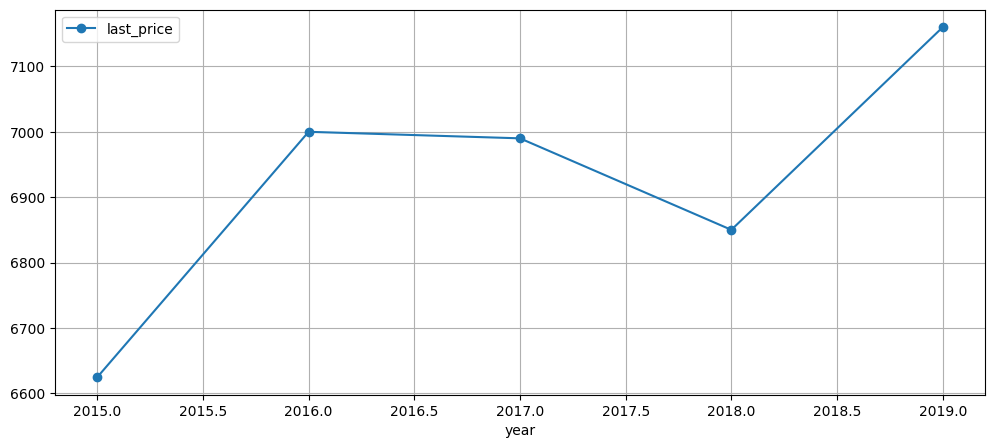

In [154]:
# построение графика
(center_st_petersburg
 .pivot_table(index='year',  values='last_price', aggfunc='median').plot(style='o-', grid=True, figsize=(12, 5))
)

Средняя цена продажи квартиры в зависимости от года публикации объявления менялась не существенно. Этот вывод не отличается от анализа по всей выборке в целом.

#### Вывод

Квартиры в центре не отличаются от квартир в целом по выборке такими параметрами как площадь, количество комнат, или высота потолков. Однако, средняя стоимость квартир в центре существенно выше: на 2315 тыс. руб.  

Стоимость квартир в центре показала прямую зависимость от площади и количества комнат. За исключением шестикомнатных квартир, их средняя стоимость ниже чем у пятикомнатных.

Жители центра также предпочитают квартиры, расположенные выше первого этажа. Разница в средней стоимости квартир, расположенных на первом этаже и "Другом" в центре составляет 1600 тыс.руб, тогда как в целом по выборке этот показатель равен 700 тыс.руб.

## Общий вывод

В ходе исследования, на основе данных сервиса Яндекс Недвижимость (архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет) мы проверяли влияние разных факторов на рыночную стоимость объектов недвижимости.

Перед тем как приступить к исследованию была произведена предобработка данных:
* убраны пропуски;
* устранены ошибки и аномалии в данных.  

Для ответа на гипотезы были посчитаны и добавлены в таблицу следующие данные:

* стоимость квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

В ходе исследования мы установили:
1. Выявлена прямая взаимосвязь между ценой и площадью квартиры, а также между ценой и количеством комнат. 
2. Категория этажа влияет на цену квартиры незначительно. Стоимость квартир на первом этаже в среднем ниже, чем на любом другом.
3. Исследование показало, что дата публикации объявления не влияет на стоимость квартиры.
4. Самая высокая стоимость квадратного метра в г.Санкт-Петербург - 104.34 тыс.руб. За ним следуют г.Пушкин и дерявня Кудрово, в которых стоимость квадратного метра составляет 99,57 и 92,45 тыс. руб. соответственно. Ниже всего стоимость квадратного метра в Гатчине, Всеволжске и Выборге, и составляет менее 70 тыс. руб. за квадратный метр.
5. По мере удаления от центра г.Санкт-Петербург средняя цена квартир снижается. 
6. Сравнивая выводы по анализу квартир в центре г.Санкт-Петербург с выводами в целом по выборке установили:
* Квартиры в центре не отличаются от квартир в целом по выборке такими параметрами как площадь, количество комнат, или высота потолков. Однако, средняя стоимость квартир в центре существенно выше: на 2315 тыс. руб.

* Стоимость квартир в центре показала прямую зависимость от площади и количества комнат. За исключением шестикомнатных квартир, их средняя стоимость ниже чем у пятикомнатных.

* Жители центра также предпочитают квартиры, расположенные выше первого этажа. Разница в средней стоимости квартир, расположенных на первом этаже и "Другом" в центре составляет 1600 тыс.руб, тогда как в целом по выборке этот показатель равен 700 тыс.руб.